In [ ]:
!pip install folium

In [128]:
# Import the Pandas library
import pandas as pd
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
import folium
from folium.plugins import HeatMap
from ipywidgets import Dropdown
import ipywidgets as widgets
from IPython.display import display, HTML

In [129]:
# Create a reference the CSV file desired
csv_path = Path("Resources/Crime_Data_from_2020_to_Present.csv")

# Read the CSV into a Pandas DataFrame
clean_data_df = pd.read_csv(csv_path, low_memory=False)

# display all columns
pd.set_option('display.max_columns', None)

# Print the first five rows of data to the screen
clean_data_df.head()

division_number date_reported        date_occurred  area    area_name  \
0         10304468    2020-01-08  2020-01-08 22:30:00     3    Southwest   
1        190101086    2020-01-02  2020-01-01 03:30:00     1      Central   
2        200110444    2020-04-14  2020-02-13 12:00:00     1      Central   
3        191501505    2020-01-01  2020-01-01 17:30:00    15  N Hollywood   
4        191921269    2020-01-01  2020-01-01 04:15:00    19      Mission   

   reporting_district  part  crime_code  \
0                 377     2         624   
1                 163     2         624   
2                 155     2         845   
3                1543     2         745   
4                1998     2         740   

                                   crime_description  modus_operandi  \
0                           BATTERY - SIMPLE ASSAULT       0444 0913   
1                           BATTERY - SIMPLE ASSAULT  0416 1822 1414   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE            1501   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)       0329 1402   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...            0329   

   victim_age victim_sex victim_descent  premise_code  \
0          36          F              B         501.0   
1          25          M              H         102.0   
2           0          X              X         726.0   
3          76          F              W         502.0   
4          31          X              X         409.0   

                            premise_description  weapon_code  \
0                        SINGLE FAMILY DWELLING        400.0   
1                                      SIDEWALK        500.0   
2                               POLICE FACILITY          NaN   
3  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)          NaN   
4                           BEAUTY SUPPLY STORE          NaN   

                               weapon_description status status_description  \
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO        Adult Other   
1                     UNKNOWN WEAPON/OTHER WEAPON     IC        Invest Cont   
2                                             NaN     AA       Adult Arrest   
3                                             NaN     IC        Invest Cont   
4                                             NaN     IC        Invest Cont   

   crime_code_1  crime_code_2  crime_code_3  crime_code_4  \
0         624.0           NaN           NaN           NaN   
1         624.0           NaN           NaN           NaN   
2         845.0           NaN           NaN           NaN   
3         745.0         998.0           NaN           NaN   
4         740.0           NaN           NaN           NaN   

                                   location cross_street  latitude  longitude  
0   1100 W  39TH                         PL          NaN   34.0141  -118.2978  
1    700 S  HILL                         ST          NaN   34.0459  -118.2545  
2    200 E  6TH                          ST          NaN   34.0448  -118.2474  
3   5400    CORTEEN                      PL          NaN   34.1685  -118.4019  
4  14400    TITUS                        ST          NaN   34.2198  -118.4468

In [130]:
# Checking for missing values in each column
missing_values = clean_data_df.isnull().sum()
print(missing_values)

division_number             0
date_reported               0
date_occurred               0
area                        0
area_name                   0
reporting_district          0
part                        0
crime_code                  0
crime_description           0
modus_operandi         118311
victim_age                  0
victim_sex             112606
victim_descent         112614
premise_code               10
premise_description       518
weapon_code            556202
weapon_description     556202
status                      0
status_description          0
crime_code_1               11
crime_code_2           790429
crime_code_3           850837
crime_code_4           852888
location                    0
cross_street           717289
latitude                    0
longitude                   0
dtype: int64


In [131]:
# Checking for duplicate entries
duplicate_rows = clean_data_df.duplicated().sum()
print(duplicate_rows)

0


In [132]:
# Replace missing values
clean_data_df.fillna("Unknown", inplace=True)
clean_data_df.head()

/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_66936/6077641.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  clean_data_df.fillna("Unknown", inplace=True)


division_number date_reported        date_occurred  area    area_name  \
0         10304468    2020-01-08  2020-01-08 22:30:00     3    Southwest   
1        190101086    2020-01-02  2020-01-01 03:30:00     1      Central   
2        200110444    2020-04-14  2020-02-13 12:00:00     1      Central   
3        191501505    2020-01-01  2020-01-01 17:30:00    15  N Hollywood   
4        191921269    2020-01-01  2020-01-01 04:15:00    19      Mission   

   reporting_district  part  crime_code  \
0                 377     2         624   
1                 163     2         624   
2                 155     2         845   
3                1543     2         745   
4                1998     2         740   

                                   crime_description  modus_operandi  \
0                           BATTERY - SIMPLE ASSAULT       0444 0913   
1                           BATTERY - SIMPLE ASSAULT  0416 1822 1414   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE            1501   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)       0329 1402   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...            0329   

   victim_age victim_sex victim_descent premise_code  \
0          36          F              B        501.0   
1          25          M              H        102.0   
2           0          X              X        726.0   
3          76          F              W        502.0   
4          31          X              X        409.0   

                            premise_description weapon_code  \
0                        SINGLE FAMILY DWELLING       400.0   
1                                      SIDEWALK       500.0   
2                               POLICE FACILITY     Unknown   
3  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     Unknown   
4                           BEAUTY SUPPLY STORE     Unknown   

                               weapon_description status status_description  \
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO        Adult Other   
1                     UNKNOWN WEAPON/OTHER WEAPON     IC        Invest Cont   
2                                         Unknown     AA       Adult Arrest   
3                                         Unknown     IC        Invest Cont   
4                                         Unknown     IC        Invest Cont   

  crime_code_1 crime_code_2 crime_code_3 crime_code_4  \
0        624.0      Unknown      Unknown      Unknown   
1        624.0      Unknown      Unknown      Unknown   
2        845.0      Unknown      Unknown      Unknown   
3        745.0        998.0      Unknown      Unknown   
4        740.0      Unknown      Unknown      Unknown   

                                   location cross_street  latitude  longitude  
0   1100 W  39TH                         PL      Unknown   34.0141  -118.2978  
1    700 S  HILL                         ST      Unknown   34.0459  -118.2545  
2    200 E  6TH                          ST      Unknown   34.0448  -118.2474  
3   5400    CORTEEN                      PL      Unknown   34.1685  -118.4019  
4  14400    TITUS                        ST      Unknown   34.2198  -118.4468

In [133]:
# Convert date columns to datetime
clean_data_df['date_reported'] = pd.to_datetime(clean_data_df['date_reported'], format='mixed')
clean_data_df['date_occurred'] = pd.to_datetime(clean_data_df['date_occurred'],  format='mixed')
clean_data_df.head()

division_number date_reported       date_occurred  area    area_name  \
0         10304468    2020-01-08 2020-01-08 22:30:00     3    Southwest   
1        190101086    2020-01-02 2020-01-01 03:30:00     1      Central   
2        200110444    2020-04-14 2020-02-13 12:00:00     1      Central   
3        191501505    2020-01-01 2020-01-01 17:30:00    15  N Hollywood   
4        191921269    2020-01-01 2020-01-01 04:15:00    19      Mission   

   reporting_district  part  crime_code  \
0                 377     2         624   
1                 163     2         624   
2                 155     2         845   
3                1543     2         745   
4                1998     2         740   

                                   crime_description  modus_operandi  \
0                           BATTERY - SIMPLE ASSAULT       0444 0913   
1                           BATTERY - SIMPLE ASSAULT  0416 1822 1414   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE            1501   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)       0329 1402   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...            0329   

   victim_age victim_sex victim_descent premise_code  \
0          36          F              B        501.0   
1          25          M              H        102.0   
2           0          X              X        726.0   
3          76          F              W        502.0   
4          31          X              X        409.0   

                            premise_description weapon_code  \
0                        SINGLE FAMILY DWELLING       400.0   
1                                      SIDEWALK       500.0   
2                               POLICE FACILITY     Unknown   
3  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     Unknown   
4                           BEAUTY SUPPLY STORE     Unknown   

                               weapon_description status status_description  \
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO        Adult Other   
1                     UNKNOWN WEAPON/OTHER WEAPON     IC        Invest Cont   
2                                         Unknown     AA       Adult Arrest   
3                                         Unknown     IC        Invest Cont   
4                                         Unknown     IC        Invest Cont   

  crime_code_1 crime_code_2 crime_code_3 crime_code_4  \
0        624.0      Unknown      Unknown      Unknown   
1        624.0      Unknown      Unknown      Unknown   
2        845.0      Unknown      Unknown      Unknown   
3        745.0        998.0      Unknown      Unknown   
4        740.0      Unknown      Unknown      Unknown   

                                   location cross_street  latitude  longitude  
0   1100 W  39TH                         PL      Unknown   34.0141  -118.2978  
1    700 S  HILL                         ST      Unknown   34.0459  -118.2545  
2    200 E  6TH                          ST      Unknown   34.0448  -118.2474  
3   5400    CORTEEN                      PL      Unknown   34.1685  -118.4019  
4  14400    TITUS                        ST      Unknown   34.2198  -118.4468

In [134]:
clean_data_df.head()

division_number date_reported       date_occurred  area    area_name  \
0         10304468    2020-01-08 2020-01-08 22:30:00     3    Southwest   
1        190101086    2020-01-02 2020-01-01 03:30:00     1      Central   
2        200110444    2020-04-14 2020-02-13 12:00:00     1      Central   
3        191501505    2020-01-01 2020-01-01 17:30:00    15  N Hollywood   
4        191921269    2020-01-01 2020-01-01 04:15:00    19      Mission   

   reporting_district  part  crime_code  \
0                 377     2         624   
1                 163     2         624   
2                 155     2         845   
3                1543     2         745   
4                1998     2         740   

                                   crime_description  modus_operandi  \
0                           BATTERY - SIMPLE ASSAULT       0444 0913   
1                           BATTERY - SIMPLE ASSAULT  0416 1822 1414   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE            1501   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)       0329 1402   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...            0329   

   victim_age victim_sex victim_descent premise_code  \
0          36          F              B        501.0   
1          25          M              H        102.0   
2           0          X              X        726.0   
3          76          F              W        502.0   
4          31          X              X        409.0   

                            premise_description weapon_code  \
0                        SINGLE FAMILY DWELLING       400.0   
1                                      SIDEWALK       500.0   
2                               POLICE FACILITY     Unknown   
3  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     Unknown   
4                           BEAUTY SUPPLY STORE     Unknown   

                               weapon_description status status_description  \
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO        Adult Other   
1                     UNKNOWN WEAPON/OTHER WEAPON     IC        Invest Cont   
2                                         Unknown     AA       Adult Arrest   
3                                         Unknown     IC        Invest Cont   
4                                         Unknown     IC        Invest Cont   

  crime_code_1 crime_code_2 crime_code_3 crime_code_4  \
0        624.0      Unknown      Unknown      Unknown   
1        624.0      Unknown      Unknown      Unknown   
2        845.0      Unknown      Unknown      Unknown   
3        745.0        998.0      Unknown      Unknown   
4        740.0      Unknown      Unknown      Unknown   

                                   location cross_street  latitude  longitude  
0   1100 W  39TH                         PL      Unknown   34.0141  -118.2978  
1    700 S  HILL                         ST      Unknown   34.0459  -118.2545  
2    200 E  6TH                          ST      Unknown   34.0448  -118.2474  
3   5400    CORTEEN                      PL      Unknown   34.1685  -118.4019  
4  14400    TITUS                        ST      Unknown   34.2198  -118.4468

In [135]:
# Create a column for Year and Month
clean_data_df['Year'] = clean_data_df['date_occurred'].dt.year
clean_data_df['Month'] = clean_data_df['date_occurred'].dt.month

In [136]:
import calendar
clean_data_df['Month'] = clean_data_df['Month'].apply(lambda x: calendar.month_abbr[x])
clean_data_df.head()




division_number date_reported       date_occurred  area    area_name  \
0         10304468    2020-01-08 2020-01-08 22:30:00     3    Southwest   
1        190101086    2020-01-02 2020-01-01 03:30:00     1      Central   
2        200110444    2020-04-14 2020-02-13 12:00:00     1      Central   
3        191501505    2020-01-01 2020-01-01 17:30:00    15  N Hollywood   
4        191921269    2020-01-01 2020-01-01 04:15:00    19      Mission   

   reporting_district  part  crime_code  \
0                 377     2         624   
1                 163     2         624   
2                 155     2         845   
3                1543     2         745   
4                1998     2         740   

                                   crime_description  modus_operandi  \
0                           BATTERY - SIMPLE ASSAULT       0444 0913   
1                           BATTERY - SIMPLE ASSAULT  0416 1822 1414   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE            1501   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)       0329 1402   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...            0329   

   victim_age victim_sex victim_descent premise_code  \
0          36          F              B        501.0   
1          25          M              H        102.0   
2           0          X              X        726.0   
3          76          F              W        502.0   
4          31          X              X        409.0   

                            premise_description weapon_code  \
0                        SINGLE FAMILY DWELLING       400.0   
1                                      SIDEWALK       500.0   
2                               POLICE FACILITY     Unknown   
3  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     Unknown   
4                           BEAUTY SUPPLY STORE     Unknown   

                               weapon_description status status_description  \
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO        Adult Other   
1                     UNKNOWN WEAPON/OTHER WEAPON     IC        Invest Cont   
2                                         Unknown     AA       Adult Arrest   
3                                         Unknown     IC        Invest Cont   
4                                         Unknown     IC        Invest Cont   

  crime_code_1 crime_code_2 crime_code_3 crime_code_4  \
0        624.0      Unknown      Unknown      Unknown   
1        624.0      Unknown      Unknown      Unknown   
2        845.0      Unknown      Unknown      Unknown   
3        745.0        998.0      Unknown      Unknown   
4        740.0      Unknown      Unknown      Unknown   

                                   location cross_street  latitude  longitude  \
0   1100 W  39TH                         PL      Unknown   34.0141  -118.2978   
1    700 S  HILL                         ST      Unknown   34.0459  -118.2545   
2    200 E  6TH                          ST      Unknown   34.0448  -118.2474   
3   5400    CORTEEN                      PL      Unknown   34.1685  -118.4019   
4  14400    TITUS                        ST      Unknown   34.2198  -118.4468   

   Year Month  
0  2020   Jan  
1  2020   Jan  
2  2020   Feb  
3  2020   Jan  
4  2020   Jan

In [137]:
top_ten_crimes = clean_data_df['crime_description'].value_counts().head(10)
top_ten_crimes

crime_description
VEHICLE - STOLEN                                           91473
BATTERY - SIMPLE ASSAULT                                   67976
THEFT OF IDENTITY                                          53467
BURGLARY FROM VEHICLE                                      52611
BURGLARY                                                   51961
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    51826
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             48876
THEFT PLAIN - PETTY ($950 & UNDER)                         43402
INTIMATE PARTNER - SIMPLE ASSAULT                          42729
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            32875
Name: count, dtype: int64

In [138]:
clean_data_df['area_name'].nunique()

21

In [139]:
# Convert 'Month' and 'Year' columns to strings and concatenate them with a hyphen in between
clean_data_df['Month/Year'] = clean_data_df['Year'].astype(str) + '-' + clean_data_df['Month'].astype(str)

# Convert the combined column to datetime format
clean_data_df['Month/Year'] = pd.to_datetime(clean_data_df['Month/Year'])



/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_66936/201298303.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  clean_data_df['Month/Year'] = pd.to_datetime(clean_data_df['Month/Year'])


In [140]:
# Group by the 'Month/Year' column and count the occurrences of each period
crimes_by_month = clean_data_df.groupby(clean_data_df['Month/Year'].dt.to_period('M')).size().reset_index(name='Total Crimes')

# Optional: Convert the period index to a string format (e.g., 'YYYY-MM') for better readability
crimes_by_month['Month/Year'] = crimes_by_month['Month/Year'].astype(str)

# Display the DataFrame
print(crimes_by_month)

   Month/Year  Total Crimes
0     2020-01         18496
1     2020-02         17255
2     2020-03         16165
3     2020-04         15683
4     2020-05         17204
5     2020-06         17034
6     2020-07         17121
7     2020-08         16874
8     2020-09         15639
9     2020-10         16491
10    2020-11         15574
11    2020-12         15946
12    2021-01         16552
13    2021-02         15411
14    2021-03         16320
15    2021-04         16057
16    2021-05         16989
17    2021-06         17156
18    2021-07         18659
19    2021-08         18374
20    2021-09         18362
21    2021-10         19305
22    2021-11         18340
23    2021-12         17926
24    2022-01         18448
25    2022-02         17700
26    2022-03         19687
27    2022-04         19784
28    2022-05         20418
29    2022-06         20201
30    2022-07         19952
31    2022-08         20081
32    2022-09         19279
33    2022-10         20274
34    2022-11       

In [141]:
clean_data_df = clean_data_df.rename(columns = { 
                                                'division_number':'Division Number',
                                                'date_reported':'Report Date',
                                                'date_occurred':'Occurence Date',
                                                'area_name':'Precinct',
                                                'reporting_district':'Reporting District',
                                                'crime_code':'Crime Code',
                                                'crime_description':'Crime Description',
                                                'modus_operandi':'Modus Operandi',
                                                'victim_age':'Victime Age',
                                                'victim_sex':'Victim Sex',
                                                'victim_descent':'Victime Descent',
                                                'premise_description':'Premise Description',
                                                'weapon_description':'Weapon Description',
                                                'status_description':'Status Description',
                                                'crime_code_1':'Crime Code 1',
                                                'crime_code_2':'Crime Code 2',
                                                'crime_code_3':'Crime Code 3',
                                                'crime_code_4':'Crime Code 4',
                                                'location':'Location',
                                                'latitude':'Latitude',
                                                'longitude':'Longitude',
                                                'Month/Year':'Month/Year',
                                                'Year':'Year',
                                                'Month':'Month'
})

In [142]:
clean_data_df.head()

Division Number Report Date      Occurence Date  area     Precinct  \
0         10304468  2020-01-08 2020-01-08 22:30:00     3    Southwest   
1        190101086  2020-01-02 2020-01-01 03:30:00     1      Central   
2        200110444  2020-04-14 2020-02-13 12:00:00     1      Central   
3        191501505  2020-01-01 2020-01-01 17:30:00    15  N Hollywood   
4        191921269  2020-01-01 2020-01-01 04:15:00    19      Mission   

   Reporting District  part  Crime Code  \
0                 377     2         624   
1                 163     2         624   
2                 155     2         845   
3                1543     2         745   
4                1998     2         740   

                                   Crime Description  Modus Operandi  \
0                           BATTERY - SIMPLE ASSAULT       0444 0913   
1                           BATTERY - SIMPLE ASSAULT  0416 1822 1414   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE            1501   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)       0329 1402   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...            0329   

   Victime Age Victim Sex Victime Descent premise_code  \
0           36          F               B        501.0   
1           25          M               H        102.0   
2            0          X               X        726.0   
3           76          F               W        502.0   
4           31          X               X        409.0   

                            Premise Description weapon_code  \
0                        SINGLE FAMILY DWELLING       400.0   
1                                      SIDEWALK       500.0   
2                               POLICE FACILITY     Unknown   
3  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     Unknown   
4                           BEAUTY SUPPLY STORE     Unknown   

                               Weapon Description status Status Description  \
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO        Adult Other   
1                     UNKNOWN WEAPON/OTHER WEAPON     IC        Invest Cont   
2                                         Unknown     AA       Adult Arrest   
3                                         Unknown     IC        Invest Cont   
4                                         Unknown     IC        Invest Cont   

  Crime Code 1 Crime Code 2 Crime Code 3 Crime Code 4  \
0        624.0      Unknown      Unknown      Unknown   
1        624.0      Unknown      Unknown      Unknown   
2        845.0      Unknown      Unknown      Unknown   
3        745.0        998.0      Unknown      Unknown   
4        740.0      Unknown      Unknown      Unknown   

                                   Location cross_street  Latitude  Longitude  \
0   1100 W  39TH                         PL      Unknown   34.0141  -118.2978   
1    700 S  HILL                         ST      Unknown   34.0459  -118.2545   
2    200 E  6TH                          ST      Unknown   34.0448  -118.2474   
3   5400    CORTEEN                      PL      Unknown   34.1685  -118.4019   
4  14400    TITUS                        ST      Unknown   34.2198  -118.4468   

   Year Month Month/Year  
0  2020   Jan 2020-01-01  
1  2020   Jan 2020-01-01  
2  2020   Feb 2020-02-01  
3  2020   Jan 2020-01-01  
4  2020   Jan 2020-01-01

In [143]:
clean_data_df.to_csv('la_data.csv', encoding='utf-8', index=False)

In [144]:
# Convert 'Month/Year' column to datetime format
clean_data_df['Month/Year'] = pd.to_datetime(clean_data_df['Month/Year'])

# Filter the DataFrame to include only rows where any of the date columns is on or before 10/31/2023
filtered_data_df = clean_data_df[(clean_data_df['Report Date'] <= '2023-10-31') & 
                                 (clean_data_df['Occurence Date'] <= '2023-10-31') & 
                                 (clean_data_df['Month/Year'] <= '2023-10-31')]

# Display the filtered DataFrame
filtered_data_df

Division Number Report Date      Occurence Date  area     Precinct  \
0              10304468  2020-01-08 2020-01-08 22:30:00     3    Southwest   
1             190101086  2020-01-02 2020-01-01 03:30:00     1      Central   
2             200110444  2020-04-14 2020-02-13 12:00:00     1      Central   
3             191501505  2020-01-01 2020-01-01 17:30:00    15  N Hollywood   
4             191921269  2020-01-01 2020-01-01 04:15:00    19      Mission   
...                 ...         ...                 ...   ...          ...   
852944        231604807  2023-01-27 2023-01-26 18:00:00    16     Foothill   
852945        231606525  2023-03-22 2023-03-22 10:00:00    16     Foothill   
852946        231210064  2023-04-12 2023-04-12 16:30:00    12  77th Street   
852947        230115220  2023-07-02 2023-07-01 00:01:00     1      Central   
852948        230906458  2023-03-05 2023-03-05 09:00:00     9     Van Nuys   

        Reporting District  part  Crime Code  \
0                      377     2         624   
1                      163     2         624   
2                      155     2         845   
3                     1543     2         745   
4                     1998     2         740   
...                    ...   ...         ...   
852944                1663     2         740   
852945                1602     1         230   
852946                1239     1         230   
852947                 154     1         352   
852948                 914     2         745   

                                        Crime Description  \
0                                BATTERY - SIMPLE ASSAULT   
1                                BATTERY - SIMPLE ASSAULT   
2               SEX OFFENDER REGISTRANT OUT OF COMPLIANCE   
3                VANDALISM - MISDEAMEANOR ($399 OR UNDER)   
4       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   
...                                                   ...   
852944  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   
852945     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
852946     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
852947                                         PICKPOCKET   
852948           VANDALISM - MISDEAMEANOR ($399 OR UNDER)   

             Modus Operandi  Victime Age Victim Sex Victime Descent  \
0                 0444 0913           36          F               B   
1            0416 1822 1414           25          M               H   
2                      1501            0          X               X   
3                 0329 1402           76          F               W   
4                      0329           31          X               X   
...                     ...          ...        ...             ...   
852944            1300 0329           23          M               H   
852945       0416 0411 1822           25          F               H   
852946  0601 0445 0416 0359           29          M               B   
852947            1822 0344           24          F               H   
852948            0329 1822           53          F               H   

       premise_code                           Premise Description weapon_code  \
0             501.0                        SINGLE FAMILY DWELLING       400.0   
1             102.0                                      SIDEWALK       500.0   
2             726.0                               POLICE FACILITY     Unknown   
3             502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     Unknown   
4             409.0                           BEAUTY SUPPLY STORE     Unknown   
...             ...                                           ...         ...   
852944        122.0                      VEHICLE, PASSENGER/TRUCK     Unknown   
852945        102.0                                      SIDEWALK       400.0   
852946        222.0                                    LAUNDROMAT       500.0   
852947        735.0               NIGHT CLUB (OPEN EVENINGS ONLY)     Unknown   
852948        502

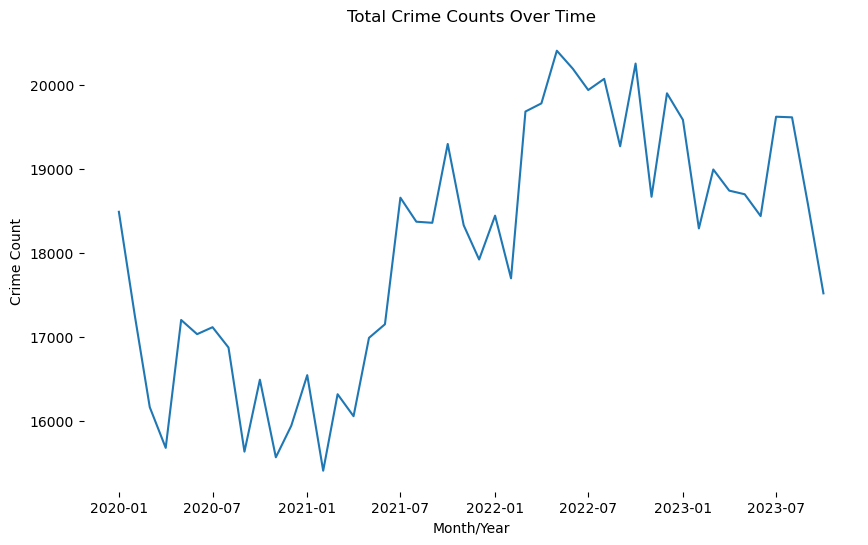

In [145]:

# Group by 'Month/Year
crime_counts_by_date = filtered_data_df.groupby('Month/Year').size()

# Plot the line plot
plt.figure(figsize=(10, 6))
plt.plot(crime_counts_by_date.index, crime_counts_by_date.values)
plt.title('Total Crime Counts Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Crime Count')
plt.grid(False)
plt.box(False)



plt.show()

/Users/michealmccloskey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michealmccloskey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

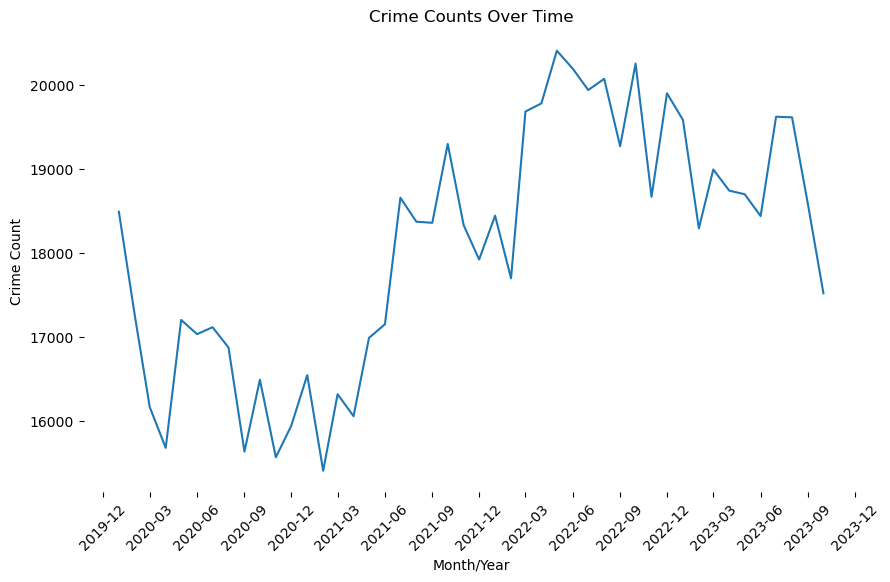

In [146]:
# # Group by 'Month/Year' and count the number of crimes
# crime_counts_by_year = filtered_data_df.groupby('Month/Year').size().reset_index(name='Crime Count')

# # Plot the line plot using Seaborn
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=crime_counts_by_year, x='Month/Year', y='Crime Count')
# plt.title('Crime Counts Over Time')
# plt.xlabel('Month/Year')
# plt.ylabel('Crime Count')
# plt.grid(False)
# plt.box(False)

# plt.show()

# Group by 'Month/Year' and count the number of crimes
crime_counts_by_year = filtered_data_df.groupby('Month/Year').size().reset_index(name='Crime Count')

# Plot the line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=crime_counts_by_year, x='Month/Year', y='Crime Count')

plt.title('Crime Counts Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Crime Count')
plt.grid(False)
plt.box(False)

# Set x-axis ticks every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)

plt.show()

In [147]:
precinct_counts = filtered_data_df['Precinct'].value_counts()
precinct_counts.sort_values(ascending=False).head(10)


Precinct
Central        55954
77th Street    52405
Pacific        48687
Southwest      46630
Hollywood      43972
Southeast      42310
Olympic        41997
Newton         41677
N Hollywood    41270
Wilshire       39533
Name: count, dtype: int64

In [148]:
# groupby to calculate total number of crimes by precinct
crime_counts_by_precinct = filtered_data_df.groupby(['Crime Description', 'Precinct']).size().reset_index(name='Total Crimes')
# Sort the data to find top 5 types of crime for each precinct
top_5_crimes_by_precinct = crime_counts_by_precinct.groupby('Precinct').apply(lambda x: x.nlargest(5, 'Total Crimes'))

# Filter the original dataset to include only rows with top 5 types of crime for each precinct
lead_crimes = filtered_data_df[filtered_data_df['Crime Description'].isin(top_5_crimes_by_precinct['Crime Description'])]

In [149]:
crime_counts_by_precinct.sum()

Crime Description    ARSONARSONARSONARSONARSONARSONARSONARSONARSONA...
Precinct             77th StreetCentralDevonshireFoothillHarborHoll...
Total Crimes                                                    831206
dtype: object

In [150]:
top_5_crimes_by_precinct

Crime Description     Precinct  \
Precinct                                                                        
77th Street 2233                                VEHICLE - STOLEN  77th Street   
            42    ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  77th Street   
            84                          BATTERY - SIMPLE ASSAULT  77th Street   
            1935                               THEFT OF IDENTITY  77th Street   
            1201               INTIMATE PARTNER - SIMPLE ASSAULT  77th Street   
...                                                          ...          ...   
Wilshire    355                                         BURGLARY     Wilshire   
            2253                                VEHICLE - STOLEN     Wilshire   
            104                         BATTERY - SIMPLE ASSAULT     Wilshire   
            376                            BURGLARY FROM VEHICLE     Wilshire   
            1997              THEFT PLAIN - PETTY ($950 & UNDER)     Wilshire   

                  Total Crimes  
Precinct                        
77th Street 2233          6839  
            42            5226  
            84            4065  
            1935          3811  
            1201          3601  
...                        ...  
Wilshire    355           3254  
            2253          3243  
            104           2815  
            376           2664  
            1997          2570  

[105 rows x 3 columns]

In [151]:
lead_crimes.head()

Division Number Report Date      Occurence Date  area   Precinct  \
0          10304468  2020-01-08 2020-01-08 22:30:00     3  Southwest   
1         190101086  2020-01-02 2020-01-01 03:30:00     1    Central   
4         191921269  2020-01-01 2020-01-01 04:15:00    19    Mission   
6         200100502  2020-01-02 2020-01-02 13:15:00     1    Central   
10        200100509  2020-01-04 2020-01-04 22:00:00     1    Central   

    Reporting District  part  Crime Code  \
0                  377     2         624   
1                  163     2         624   
4                 1998     2         740   
6                  161     1         442   
10                 192     1         330   

                                    Crime Description       Modus Operandi  \
0                            BATTERY - SIMPLE ASSAULT            0444 0913   
1                            BATTERY - SIMPLE ASSAULT       0416 1822 1414   
4   VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...                 0329   
6            SHOPLIFTING - PETTY THEFT ($950 & UNDER)  1402 2004 0344 0387   
10                              BURGLARY FROM VEHICLE  1822 1414 0344 1307   

    Victime Age Victim Sex Victime Descent premise_code  \
0            36          F               B        501.0   
1            25          M               H        102.0   
4            31          X               X        409.0   
6            23          M               H        404.0   
10           29          M               A        101.0   

       Premise Description weapon_code  \
0   SINGLE FAMILY DWELLING       400.0   
1                 SIDEWALK       500.0   
4      BEAUTY SUPPLY STORE     Unknown   
6         DEPARTMENT STORE     Unknown   
10                  STREET       306.0   

                                Weapon Description status Status Description  \
0   STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO        Adult Other   
1                      UNKNOWN WEAPON/OTHER WEAPON     IC        Invest Cont   
4                                          Unknown     IC        Invest Cont   
6                                          Unknown     IC        Invest Cont   
10                              ROCK/THROWN OBJECT     IC        Invest Cont   

   Crime Code 1 Crime Code 2 Crime Code 3 Crime Code 4  \
0         624.0      Unknown      Unknown      Unknown   
1         624.0      Unknown      Unknown      Unknown   
4         740.0      Unknown      Unknown      Unknown   
6         442.0        998.0      Unknown      Unknown   
10        330.0      Unknown      Unknown      Unknown   

                                    Location cross_street  Latitude  \
0    1100 W  39TH                         PL      Unknown   34.0141   
1     700 S  HILL                         ST      Unknown   34.0459   
4   14400    TITUS                        ST      Unknown   34.2198   
6     700 S  FIGUEROA                     ST      Unknown   34.0483   
10                                      15TH        OLIVE   34.0359   

    Longitude  Year Month Month/Year  
0   -118.2978  2020   Jan 2020-01-01  
1   -118.2545  2020   Jan 2020-01-01  
4   -118.4468  2020   Jan 2020-01-01  
6   -118.2631  2020   Jan 2020-01-01  
10  -118.2648  2020   Jan 2020-01-01

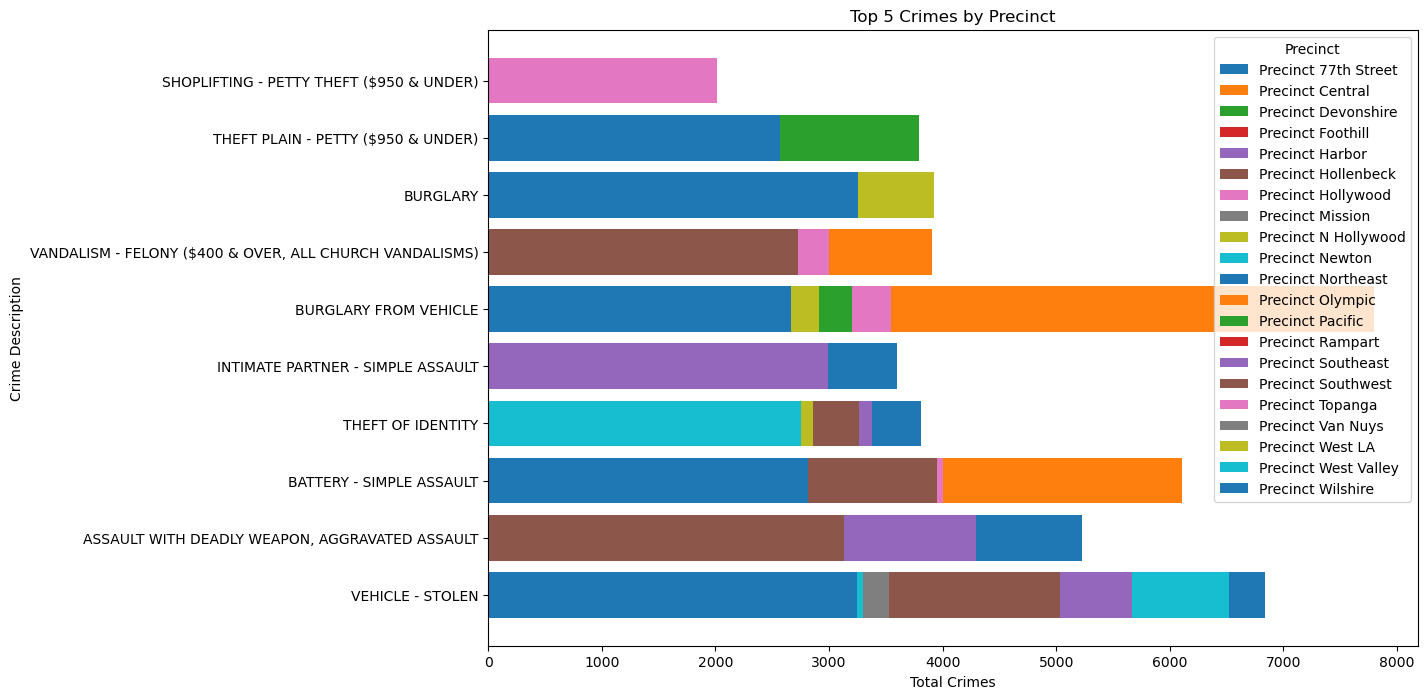

In [152]:

# Define a function to get top 5 crimes for each precinct
def get_top_5_crimes(df):
    return df.nlargest(5, 'Total Crimes')

# Apply the function to each group within the 'Precinct' group and concatenate the results into a single DataFrame
top_5_crimes_by_precinct = crime_counts_by_precinct.groupby('Precinct').apply(get_top_5_crimes).reset_index(drop=True)

# Plot the bar chart
plt.figure(figsize=(12, 8))
for precinct, group in top_5_crimes_by_precinct.groupby('Precinct'):
    plt.barh(group['Crime Description'], group['Total Crimes'], label=f'Precinct {precinct}')

plt.xlabel('Total Crimes')
plt.ylabel('Crime Description')
plt.title('Top 5 Crimes by Precinct')
plt.legend(title='Precinct')
plt.show()

In [153]:
crime_counts_by_precinct = filtered_data_df.groupby('Precinct').size().reset_index(name='Total Crimes')

# Find the top 5 precincts with the most reported crimes
top_5_precincts = crime_counts_by_precinct.nlargest(5, 'Total Crimes')

print(top_5_precincts)

       Precinct  Total Crimes
1       Central         55954
0   77th Street         52405
12      Pacific         48687
15    Southwest         46630
6     Hollywood         43972


In [154]:
top_5_precincts_list = top_5_precincts['Precinct'].tolist()
top_5_data = filtered_data_df[filtered_data_df['Precinct'].isin(top_5_precincts_list)]

# Group the filtered data by 'Crime Description' and count occurrences
crime_counts_by_description = top_5_data.groupby('Crime Description').size().reset_index(name='Total Crimes')

# Sort the counts in descending order
sorted_crime_counts = crime_counts_by_description.sort_values(by='Total Crimes', ascending=False)

# Select the top 5 most common crimes
top_5_crimes = sorted_crime_counts.head(5)

top_5_crimes.head(10)

Crime Description  Total Crimes
128                                   VEHICLE - STOLEN         23708
4                             BATTERY - SIMPLE ASSAULT         21042
21                               BURGLARY FROM VEHICLE         17820
2       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT         16337
125  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...         15244

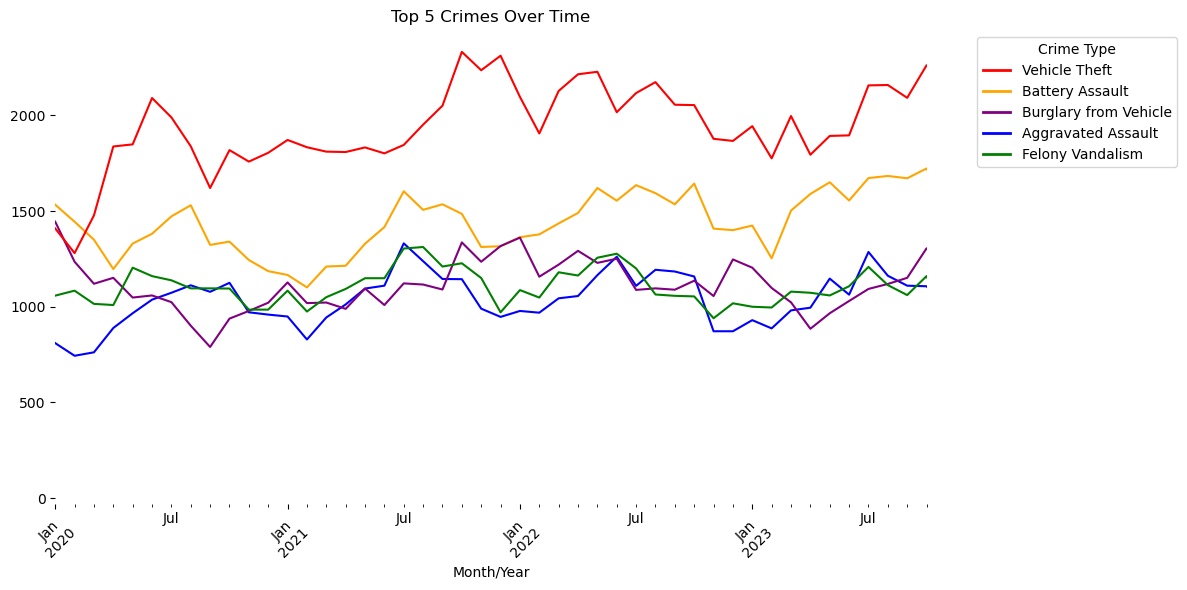

In [155]:
# Convert 'Month/Year' column to datetime format
crime_counts_by_month_year.index = pd.to_datetime(crime_counts_by_month_year.index)
legend_labels = {
    'VEHICLE - STOLEN': 'Vehicle Theft',
    'BATTERY - SIMPLE ASSAULT': 'Battery Assault',
    'BURGLARY FROM VEHICLE': 'Burglary from Vehicle',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Aggravated Assault',
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'Felony Vandalism'}

color_dict = {
    'VEHICLE - STOLEN': 'red',
    'BATTERY - SIMPLE ASSAULT': 'orange',
    'BURGLARY FROM VEHICLE': 'purple',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'blue',
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'green'
}
# Plot the data
ax = crime_counts_by_month_year.plot(kind='line', figsize=(12, 6), color=[color_dict.get(x, '#333333')
                                                    for x in crime_counts_by_month_year.columns])

# Customize the plot
plt.title('Top 5 Crimes Over Time')
# plt.xlabel('Month/Year')
# plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(False)


# Add a legend with custom colors
handles = [plt.Line2D([0], [0], color=color_dict[key], linewidth=2, linestyle='-') for key in color_dict]
labels = [legend_labels.get(key, key) for key in color_dict]
plt.legend(handles, labels, title='Crime Type', bbox_to_anchor=(1.05, 1), loc='best')

# Set x-axis limit
plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2023-10-01'))

# Show the plot
plt.tight_layout()
plt.box(False)
plt.show()


/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_66936/4268937615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_df['Hour'] = filtered_data_df['Occurence Date'].dt.hour
/Users/michealmccloskey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michealmccloskey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users

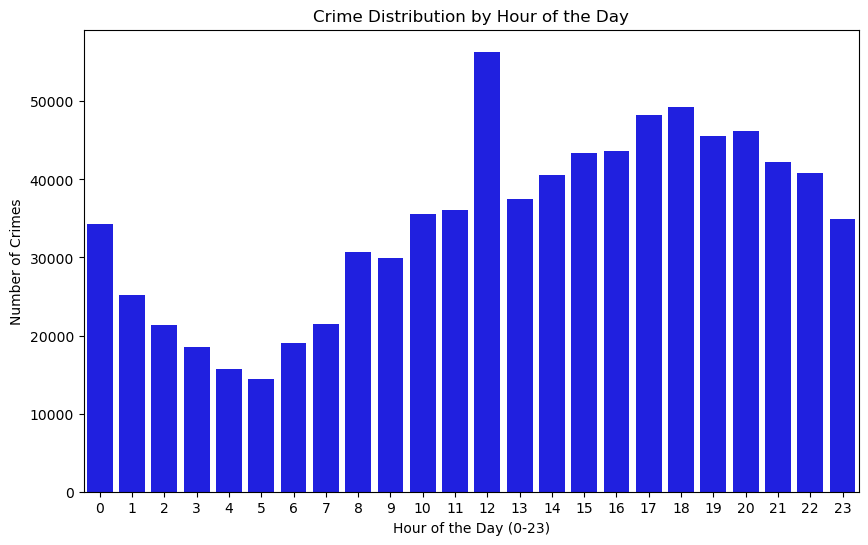

In [156]:
# Extracting hour from the 'date_occurred' column
filtered_data_df['Hour'] = filtered_data_df['Occurence Date'].dt.hour

# Counting crimes by each hour of the day
hourly_crime_counts = filtered_data_df['Hour'].value_counts().sort_index()

# Plotting the distribution of crimes by hour
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_crime_counts.index, y=hourly_crime_counts.values, color = "blue")

# Updating plot labels and title
plt.title('Crime Distribution by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Crimes')

# Show the plot
plt.xticks(range(24), [str(hour) for hour in range(24)])  # Set x-axis ticks
plt.grid(False)
plt.show()

/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_66936/664553853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_df['weekday_name'] = filtered_data_df['Occurence Date'].dt.day_name()


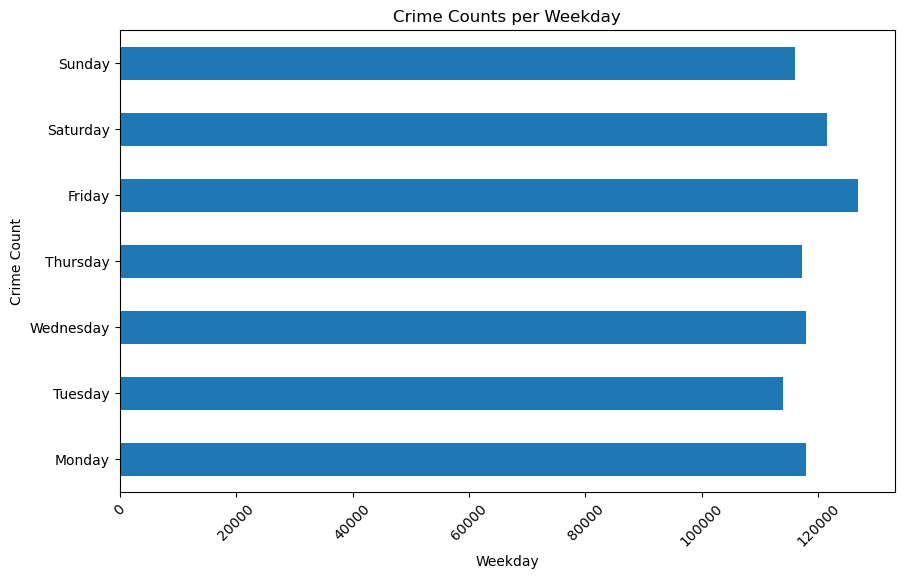

In [157]:
# new column for weekday name
filtered_data_df['weekday_name'] = filtered_data_df['Occurence Date'].dt.day_name()

# Group by weekday name and count the occurrences
crime_counts_per_weekday = filtered_data_df['weekday_name'].value_counts()

# Plot the data
crime_counts_per_weekday = crime_counts_per_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
crime_counts_per_weekday.plot(kind='barh', figsize=(10, 6))
plt.title('Crime Counts per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.show()

In [158]:
start_date = '2020-01-01'
end_date = '2023-10-31'
period_data = filtered_crime_data[(filtered_crime_data['Report Date'] >= start_date) & (filtered_data_df['Report Date'] <= end_date)]

# Step 2: Group the data by month and count the number of crimes reported
crime_counts_per_month = period_data.groupby(['Year', 'Month']).size().reset_index(name='Crime Count')

# Step 3: Calculate the percentage change in crime counts compared to the previous month
crime_counts_per_month['Percentage Change'] = crime_counts_per_month['Crime Count'].pct_change()

# Step 4: Identify the months with the highest percentage change (biggest spikes)
biggest_spikes = crime_counts_per_month.nlargest(5, 'Percentage Change')

# Print or visualize the results
biggest_spikes


/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_66936/1630961907.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  period_data = filtered_crime_data[(filtered_crime_data['Report Date'] >= start_date) & (filtered_data_df['Report Date'] <= end_date)]


Year Month  Crime Count  Percentage Change
13  2021   Aug         7123           0.164841
17  2021   Jul         7205           0.162659
34  2022   Oct         7042           0.144854
37  2023   Aug         7228           0.141323
40  2023   Jul         7406           0.139911

In [159]:

# Filter the data for the year 2020
data_2020 = filtered_data_df[filtered_data_df['Year'] == 2020]
top_crimes_2020 = data_2020["Crime Description"].value_counts()
top_crimes_2020.head()

Crime Description
VEHICLE - STOLEN                                           20768
BATTERY - SIMPLE ASSAULT                                   16329
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    12924
BURGLARY                                                   12836
BURGLARY FROM VEHICLE                                      12709
Name: count, dtype: int64

In [160]:
# Filter the data for the year 2021
data_2021 = filtered_data_df[filtered_data_df['Year'] == 2021]
top_crimes_2021 = data_2021["Crime Description"].value_counts()
top_crimes_2021.head()


Crime Description
VEHICLE - STOLEN                                           23674
BATTERY - SIMPLE ASSAULT                                   16193
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    13674
BURGLARY FROM VEHICLE                                      13477
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             12734
Name: count, dtype: int64

In [161]:
# Filter the data for the year 2022
data_2022 = filtered_data_df[filtered_data_df['Year'] == 2022]
top_crimes_2022 = data_2022["Crime Description"].value_counts()
top_crimes_2022.head()

Crime Description
VEHICLE - STOLEN            24723
THEFT OF IDENTITY           21777
BATTERY - SIMPLE ASSAULT    18051
BURGLARY FROM VEHICLE       14221
BURGLARY                    14053
Name: count, dtype: int64

In [162]:
# Filter the data for the year 2023
data_2023 = filtered_data_df[filtered_data_df['Year'] == 2023]
top_crimes_2023 = data_2023["Crime Description"].value_counts()
top_crimes_2023

Crime Description
VEHICLE - STOLEN                                      19778
BATTERY - SIMPLE ASSAULT                              15608
BURGLARY                                              11472
THEFT OF IDENTITY                                     10816
BURGLARY FROM VEHICLE                                 10722
                                                      ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)        1
FAILURE TO DISPERSE                                       1
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)              1
TELEPHONE PROPERTY - DAMAGE                               1
PETTY THEFT - AUTO REPAIR                                 1
Name: count, Length: 129, dtype: int64

In [191]:
# import folium
# from folium import plugins
# from IPython.display import HTML, display

# # Define the top 5 crimes for each year
# top_5_crimes_by_year = {
#     2020: ["VEHICLE - STOLEN", "BATTERY - SIMPLE ASSAULT", "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",
#            "BURGLARY", "BURGLARY FROM VEHICLE"],
#     2021: ["VEHICLE - STOLEN", "BATTERY - SIMPLE ASSAULT", "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",
#            "BURGLARY FROM VEHICLE", "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"],
#     2022: ["VEHICLE - STOLEN", "THEFT OF IDENTITY", "BATTERY - SIMPLE ASSAULT", "BURGLARY FROM VEHICLE", "BURGLARY"],
#     2023: ["VEHICLE - STOLEN", "BATTERY - SIMPLE ASSAULT", "BURGLARY", "BURGLARY FROM VEHICLE",
#            "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)"]
# }

# # Define the top 5 precincts
# top_5_precincts = {
#     "Central": [34.0519, -118.2553],
#     "Southwest": [34.0297, -118.3310],
#     "Hollenbeck": [34.0496, -118.2088],
#     "Harbor": [33.7576608970001, -118.289241553],
#     "77th Street": [33.9703073800001, -118.277669655]
# }

# # Preprocess the dataset to filter data for the selected year and top 5 crimes
# def filter_data_by_year_and_top_crimes(year, top_crimes):
#     return filtered_data_df[(filtered_data_df['Year'] == year) & (filtered_data_df['Crime Description'].isin(top_crimes))]

# # Group the data by latitude and longitude and count the number of crimes
# def group_by_location(data):
#     return data.groupby(['Latitude', 'Longitude']).size().reset_index(name='Crime Count')

# # Create a heatmap using folium
# def create_heatmap(data):
#     m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)
#     heatmap_data = [[row['Latitude'], row['Longitude'], row['Crime Count']] for index, row in data.iterrows()]
#     plugins.HeatMap(heatmap_data).add_to(m)
#     return m

# # Define a callback function to update the heatmap based on the selected year
# def update_heatmap(year):
#     filtered_data = filter_data_by_year_and_top_crimes(int(year), top_5_crimes_by_year[int(year)])
#     grouped_data = group_by_location(filtered_data)
#     heatmap = create_heatmap(grouped_data)

#     # Add markers for the top 5 precincts
#     for precinct, location in top_5_precincts.items():
#         folium.Marker(location=location, popup=precinct).add_to(heatmap)

#     display(heatmap)
# # Display the initial heatmap
# initial_year = 2020
# update_heatmap(initial_year)

# from IPython.display import display, HTML

# # Define a basic HTML dropdown menu with selectable years
# years = [2020, 2021, 2022, 2023]
# dropdown_options = ''.join([f'<option value="{year}">{year}</option>' for year in years])
# dropdown_html = f"""
# <select id="year" onchange="update_heatmap(this.value)">
#    <div style="position: absolute; top: 10px; right: 10px;">
#     <select id="year" onchange="update_heatmap(this.value)">
#         <option value="2020">2020</option>
#         <option value="2021">2021</option>
#         <option value="2022">2022</option>
#         <option value="2023">2023</option>
#     </select>
# </div>
# </select>
# """

# # Display the dropdown menu
# display(HTML(dropdown_html))


# Define the top 5 crimes for each year
top_5_crimes_by_year = {
    2020: ["VEHICLE - STOLEN", "BATTERY - SIMPLE ASSAULT", "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",
           "BURGLARY", "BURGLARY FROM VEHICLE"],
    2021: ["VEHICLE - STOLEN", "BATTERY - SIMPLE ASSAULT", "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",
           "BURGLARY FROM VEHICLE", "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"],
    2022: ["VEHICLE - STOLEN", "THEFT OF IDENTITY ", "BATTERY - SIMPLE ASSAULT", "BURGLARY FROM VEHICLE", "BURGLARY"],
    2023: ["VEHICLE - STOLEN", "BATTERY - SIMPLE ASSAULT", "BURGLARY", "BURGLARY FROM VEHICLE",
           "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)"]
}

# Define the top 5 precincts
top_5_precincts = {
    "Central": [34.0519, -118.2553],
    "Southwest": [34.0297, -118.3310],
    "Hollenbeck": [34.0496, -118.2088],
    "Harbor": [33.7576608970001, -118.289241553],
    "77th Street": [33.9703073800001, -118.277669655]
}

# Preprocess the dataset to filter data for the selected year and top 5 crimes
def filter_data_by_year_and_top_crimes(year, top_crimes):
    return filtered_data_df[(filtered_data_df['Year'] == year) & (filtered_data_df['Crime Description'].isin(top_crimes))]

# Group the data by latitude and longitude and count the number of crimes
def group_by_location(data):
    return data.groupby(['Latitude', 'Longitude']).size().reset_index(name='Crime Count')

# Create a heatmap using folium
def create_heatmap(data):
    m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)
    heatmap_data = [[row['Latitude'], row['Longitude'], row['Crime Count']] for index, row in data.iterrows()]
    folium.plugins.HeatMap(heatmap_data).add_to(m)
    return m

# Define a callback function to update the heatmap based on the selected year
def update_heatmap(year):
    filtered_data = filter_data_by_year_and_top_crimes(int(year), top_5_crimes_by_year[int(year)])
    grouped_data = group_by_location(filtered_data)
    heatmap = create_heatmap(grouped_data)

    # Add markers for the top 5 precincts
    for precinct, location in top_5_precincts.items():
        folium.Marker(location=location, popup=precinct).add_to(heatmap)

    display(heatmap)

# Create a dropdown widget for selecting the year
dropdown = widgets.Dropdown(
    options=[('2020', 2020), ('2021', 2021), ('2022', 2022), ('2023', 2023)],
    value=2020,
    description='Year:',
    disabled=False,
)

# Display the dropdown widget
display(dropdown)

# Create an observer to update the heatmap when the dropdown value changes
dropdown.observe(lambda change: update_heatmap(change.new), names='value')

# Display the initial heatmap
update_heatmap(dropdown.value)

Dropdown(description='Year:', options=(('2020', 2020), ('2021', 2021), ('2022', 2022), ('2023', 2023)), value=…

In [164]:
# Create a base map centered around Los Angeles
m = folium.Map(location=[34.052235, -118.243683], zoom_start=10)

# Add LAPD police precincts as markers
police_stations = [
    {"name": "Central", "location": [34.0519, -118.2553]},
    {"name": "Southwest", "location": [34.0297, -118.3310]},
    {"name": "Hollenbeck", "location": [34.0496, -118.2088]},
    {"name": "Harbor", "location": [33.7576608970001, -118.289241553]},
    {"name": "77th Street", "location": [33.9703073800001, -118.277669655]},
    {"name": "Southeast", "location": [33.9386273800001, -118.275394206]},
    {"name": "Newton", "location": [34.012355905, -118.256118891]},
    {"name": "West Los Angeles", "location": [34.0437774120001, -118.450779541]},
    {"name": "Wilshire", "location": [34.046747682, -118.342829525]},
    {"name": "Olympic", "location": [34.050208529, -118.291175911]},
    {"name": "Rampart", "location": [34.056690437, -118.266979649]},
    {"name": "Hollywood", "location": [34.095833225, -118.33066931]},
    {"name": "Northeast", "location": [34.119200666, -118.249414484]},
    {"name": "North Hollywood", "location": [34.1716939300001, -118.385859348]},
    {"name": "Van Nuys", "location": [34.1837432730001, -118.445225709]},
    {"name": "West Valley", "location": [34.193397227, -118.547454438]},
    {"name": "Topanga", "location": [34.221376654, -118.599636542]},
    {"name": "Pacific", "location": [33.9916553210001, -118.419841576]},
    {"name": "Foothill", "location": [34.2530912220001, -118.410417183]},
    {"name": "Devonshire", "location": [34.256969059, -118.531373363]},
    {"name": "Mission", "location": [34.272979397, -118.468197808]}
    
]

for station in police_stations:
    folium.Marker(location=station["location"], popup=station["name"]).add_to(m)

# Save the map as HTML
m.save("police_precincts.html")

# Display the map
m

In [165]:
filtered_data_df.head()

Division Number Report Date      Occurence Date  area     Precinct  \
0         10304468  2020-01-08 2020-01-08 22:30:00     3    Southwest   
1        190101086  2020-01-02 2020-01-01 03:30:00     1      Central   
2        200110444  2020-04-14 2020-02-13 12:00:00     1      Central   
3        191501505  2020-01-01 2020-01-01 17:30:00    15  N Hollywood   
4        191921269  2020-01-01 2020-01-01 04:15:00    19      Mission   

   Reporting District  part  Crime Code  \
0                 377     2         624   
1                 163     2         624   
2                 155     2         845   
3                1543     2         745   
4                1998     2         740   

                                   Crime Description  Modus Operandi  \
0                           BATTERY - SIMPLE ASSAULT       0444 0913   
1                           BATTERY - SIMPLE ASSAULT  0416 1822 1414   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE            1501   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)       0329 1402   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...            0329   

   Victime Age Victim Sex Victime Descent premise_code  \
0           36          F               B        501.0   
1           25          M               H        102.0   
2            0          X               X        726.0   
3           76          F               W        502.0   
4           31          X               X        409.0   

                            Premise Description weapon_code  \
0                        SINGLE FAMILY DWELLING       400.0   
1                                      SIDEWALK       500.0   
2                               POLICE FACILITY     Unknown   
3  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     Unknown   
4                           BEAUTY SUPPLY STORE     Unknown   

                               Weapon Description status Status Description  \
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO        Adult Other   
1                     UNKNOWN WEAPON/OTHER WEAPON     IC        Invest Cont   
2                                         Unknown     AA       Adult Arrest   
3                                         Unknown     IC        Invest Cont   
4                                         Unknown     IC        Invest Cont   

  Crime Code 1 Crime Code 2 Crime Code 3 Crime Code 4  \
0        624.0      Unknown      Unknown      Unknown   
1        624.0      Unknown      Unknown      Unknown   
2        845.0      Unknown      Unknown      Unknown   
3        745.0        998.0      Unknown      Unknown   
4        740.0      Unknown      Unknown      Unknown   

                                   Location cross_street  Latitude  Longitude  \
0   1100 W  39TH                         PL      Unknown   34.0141  -118.2978   
1    700 S  HILL                         ST      Unknown   34.0459  -118.2545   
2    200 E  6TH                          ST      Unknown   34.0448  -118.2474   
3   5400    CORTEEN                      PL      Unknown   34.1685  -118.4019   
4  14400    TITUS                        ST      Unknown   34.2198  -118.4468   

   Year Month Month/Year  Hour weekday_name  
0  2020   Jan 2020-01-01    22    Wednesday  
1  2020   Jan 2020-01-01     3    Wednesday  
2  2020   Feb 2020-02-01    12     Thursday  
3  2020   Jan 2020-01-01    17    Wednesday  
4  2020   Jan 2020-01-01     4    Wednesday

In [166]:
# Assuming `filtered_data_df` contains the LA crime data
# Filter the data to include only the top 5 crimes
top_5_crimes = ['VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT', 'BURGLARY FROM VEHICLE', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)']
top_5_data = filtered_data_df[filtered_data_df['Crime Description'].isin(top_5_crimes)]

# Group the filtered data by latitude and longitude
crime_counts = top_5_data.groupby(['Latitude', 'Longitude']).size().reset_index(name='crime_count')

# Create a map centered on LA
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Create a function to update the heatmap based on the selected crime type
def update_heatmap(crime_type):
    selected_data = crime_counts[crime_counts['Crime Description'] == crime_type]
    heatmap_data = [[row['Latitude'], row['Longitude'], row['crime_count']] for index, row in selected_data.iterrows()]
    
    # Remove existing heatmap layer
    for h in m._children:
        if isinstance(h, HeatMap):
            m.remove_child(h)
    
    # Add new heatmap layer
    HeatMap(heatmap_data).add_to(m)

# Create a dropdown menu to select the crime type
crime_types = ['VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT', 'BURGLARY FROM VEHICLE', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)']
dropdown = widgets.Dropdown(options=crime_types, description='Crime Type:')

# Display the dropdown menu and map
widgets.interactive(update_heatmap, crime_type=dropdown)
display(dropdown)
display(m)


Dropdown(description='Crime Type:', options=('VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT', 'BURGLARY FROM VE…

In [167]:

# Group the data by police precinct and count the number of crimes
crime_counts = filtered_data_df.groupby(['Precinct']).size().reset_index(name='crime_count')

# Normalize the crime counts to a range suitable for marker sizes
min_count = crime_counts['crime_count'].min()
max_count = crime_counts['crime_count'].max()
crime_counts['normalized_count'] = (crime_counts['crime_count'] - min_count) / (max_count - min_count)

# Create a base map centered around Los Angeles
m = folium.Map(location=[34.052235, -118.243683], zoom_start=10)

# Add LAPD police precincts as markers with sizes proportional to crime counts
for station in police_stations:
    precinct_data = crime_counts[crime_counts['Precinct'] == station["name"]]
    if not precinct_data.empty:
        normalized_count = precinct_data['normalized_count'].values[0]
        # Set the marker size based on the normalized crime count
        marker_size = int(normalized_count * 10) + 5  # Adjust the multiplier and offset as needed
        folium.CircleMarker(location=station["location"], radius=marker_size, popup=station["name"]).add_to(m)

# Save the map as HTML
m.save("police_precincts_with_size.html")

# Display the map
m

In [168]:


# Reading CSV data from a file
filtered_data_df = pd.read_csv("la_data.csv")

# Converting DataFrame to JSON
json_data = filtered_data_df.to_json(orient="records")

# Writing JSON data to a file
with open("output.json", "w") as f:
    f.write(json_data)

/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_66936/2287941587.py:2: DtypeWarning: Columns (13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_data_df = pd.read_csv("la_data.csv")


In [169]:
crime_dict = filtered_data_df['Crime Description'].unique()


In [170]:
# find violent crime rates over time
# Sample data
data = {
    'Crime Description': ['BATTERY - SIMPLE ASSAULT',
       'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT OF IDENTITY',
       'ROBBERY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'BURGLARY', 'VEHICLE - STOLEN',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'BRANDISH WEAPON', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'BUNCO, GRAND THEFT', 'THEFT, PERSON',
       'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN',
       'BATTERY POLICE (SIMPLE)',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'VIOLATION OF COURT ORDER', 'TRESPASSING',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
       'VIOLATION OF RESTRAINING ORDER', 'DISTURBING THE PEACE',
       'THEFT FROM MOTOR VEHICLE - ATTEMPT',
       'THROWING OBJECT AT MOVING VEHICLE', 'EXTORTION',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
       'CHILD STEALING',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'ATTEMPTED ROBBERY', 'OTHER ASSAULT', 'BOMB SCARE',
       'DOCUMENT FORGERY / STOLEN FELONY',
       'SEXUAL PENETRATION W/FOREIGN OBJECT',
       'SHOTS FIRED AT INHABITED DWELLING', 'BURGLARY, ATTEMPTED',
       'FAILURE TO YIELD', 'PURSE SNATCHING', 'INDECENT EXPOSURE',
       'ORAL COPULATION', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'VIOLATION OF TEMPORARY RESTRAINING ORDER', 'BUNCO, PETTY THEFT',
       'KIDNAPPING - GRAND ATTEMPT',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'RESISTING ARREST',
       'DISCHARGE FIREARMS/SHOTS FIRED',
       'THREATENING PHONE CALLS/LETTERS', 'KIDNAPPING',
       'LEWD/LASCIVIOUS ACTS WITH CHILD', 'LEWD CONDUCT',
       'UNAUTHORIZED COMPUTER ACCESS',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'CHILD NEGLECT (SEE 300 W.I.C.)', 'CONTEMPT OF COURT',
       'CHILD ANNOYING (17YRS & UNDER)', 'BUNCO, ATTEMPT',
       'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT', 'PIMPING', 'STALKING',
       'THEFT PLAIN - ATTEMPT', 'RAPE, ATTEMPTED',
       'SHOPLIFTING - ATTEMPT', 'THEFT FROM PERSON - ATTEMPT',
       'VEHICLE - ATTEMPT STOLEN', 'FALSE IMPRISONMENT',
       'BURGLARY FROM VEHICLE, ATTEMPTED', 'PICKPOCKET',
       'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
       'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER',
       'COUNTERFEIT', 'CREDIT CARDS, FRAUD USE ($950 & UNDER',
       'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
       'CRIMINAL HOMICIDE', 'DOCUMENT WORTHLESS ($200 & UNDER)',
       'PROWLER', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01',
       'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
       'DISHONEST EMPLOYEE - GRAND THEFT',
       'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS', 'CHILD PORNOGRAPHY',
       'PEEPING TOM', 'BATTERY ON A FIREFIGHTER',
       'TILL TAP - PETTY ($950 & UNDER)',
       'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
       'TILL TAP - GRAND THEFT ($950.01 & OVER)',
       'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
       'FIREARMS RESTRAINING ORDER (FIREARMS RO)',
       'DRIVING WITHOUT OWNER CONSENT (DWOC)',
       'DOCUMENT WORTHLESS ($200.01 & OVER)', 'PANDERING',
       'CRUELTY TO ANIMALS', 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
       'LYNCHING - ATTEMPTED', 'ILLEGAL DUMPING',
       'PETTY THEFT - AUTO REPAIR', 'MANSLAUGHTER, NEGLIGENT',
       'BOAT - STOLEN', 'RECKLESS DRIVING', 'PURSE SNATCHING - ATTEMPT',
       'FALSE POLICE REPORT', 'BIKE - ATTEMPTED STOLEN', 'CONSPIRACY',
       'CONTRIBUTING', 'WEAPONS POSSESSION/BOMBING', 'BRIBERY',
       'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
       'GRAND THEFT / INSURANCE FRAUD', 'LYNCHING', 'DISRUPT SCHOOL',
       'DISHONEST EMPLOYEE - PETTY THEFT',
       'THEFT, COIN MACHINE - ATTEMPT',
       'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
       'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)',
       'DRUGS, TO A MINOR', 'GRAND THEFT / AUTO REPAIR', 'DRUNK ROLL',
       'PICKPOCKET, ATTEMPT', 'CHILD ABANDONMENT',
       'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)',
       'TELEPHONE PROPERTY - DAMAGE',
       'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
       'BIGAMY', 'FAILURE TO DISPERSE',
       'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)',
       'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)',
       'BLOCKING DOOR INDUCTION CENTER', 'INCITING A RIOT',
       'DISHONEST EMPLOYEE ATTEMPTED THEFT']
      
}

crime_dict_df= pd.DataFrame(data)

# Keywords indicating violent crimes
violent_keywords = ['ASSAULT', 'RAPE', 'ROBBERY', 'HOMICIDE', 'LYNCHING','BATTERY','SHOTS','SEX, UNLAWFUL', 'SHOTS FIRED']



# Create a mask based on the presence of keywords in the 'Crime Description' column
mask = crime_dict_df['Crime Description'].str.contains('|'.join(violent_keywords), case=False)

# Filter out the rows corresponding to violent crimes
violent_crimes = crime_dict_df[mask]

print(violent_crimes)

                                    Crime Description
0                            BATTERY - SIMPLE ASSAULT
4                                      RAPE, FORCIBLE
11                  INTIMATE PARTNER - SIMPLE ASSAULT
14                                            ROBBERY
15     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
20              INTIMATE PARTNER - AGGRAVATED ASSAULT
23                        BATTERY WITH SEXUAL CONTACT
25                            BATTERY POLICE (SIMPLE)
38                                  ATTEMPTED ROBBERY
39                                      OTHER ASSAULT
43                  SHOTS FIRED AT INHABITED DWELLING
55                     DISCHARGE FIREARMS/SHOTS FIRED
66            CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT
70                                    RAPE, ATTEMPTED
81   SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT
82                                  CRIMINAL HOMICIDE
86       ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER
91                          

In [171]:
violent_crimes.head()

Crime Description
0                         BATTERY - SIMPLE ASSAULT
4                                   RAPE, FORCIBLE
11               INTIMATE PARTNER - SIMPLE ASSAULT
14                                         ROBBERY
15  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT

In [172]:

violent_crimes = ["BATTERY - SIMPLE ASSAULT", 
                  "RAPE, FORCIBLE",
                  "INTIMATE PARTNER - SIMPLE ASSAULT",
                  "ROBBERY",
                  "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",
                  "INTIMATE PARTNER - AGGRAVATED ASSAULT",
                  "BATTERY WITH SEXUAL CONTACT",
                  "BATTERY POLICE (SIMPLE)",
                  "ATTEMPTED ROBBERY",
                  "OTHER ASSAULT",
                  "CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT",
                  "RAPE, ATTEMPTED",
                  "SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT",
                  "DISCHARGE FIREARMS/SHOTS FIRED",
                  "SHOTS FIRED AT INHABITED DWELLING",
                  "CRIMINAL HOMICIDE",
                  "ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER",
                  "BATTERY ON A FIREFIGHTER",
                  "CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT",
                  "LYNCHING - ATTEMPTED",
                  "LYNCHING",
                  "SEXUAL PENETRATION W/FOREIGN OBJECT",
                  'MANSLAUGHTER, NEGLIGENT']

# Filter the dataset to include only the violent crimes
violent_crimes_df = filtered_data_df[filtered_data_df['Crime Description'].isin(violent_crimes)]

# Convert occurrence date to datetime if not already
violent_crimes_df['Occurence Date'] = pd.to_datetime(violent_crimes_df['Occurence Date'])

# Sort by occurrence date
violent_crimes_df = violent_crimes_df.sort_values(by='Occurence Date')

# Display the first few rows of the resulting dataframe
violent_crimes_df.head()


/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_66936/3962841162.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_crimes_df['Occurence Date'] = pd.to_datetime(violent_crimes_df['Occurence Date'])


Division Number Report Date      Occurence Date  area     Precinct  \
195828        221407878  2022-03-19 2020-01-01 00:01:00    14      Pacific   
198387        222008538  2022-04-16 2020-01-01 00:01:00    20      Olympic   
120960        201814725  2020-07-27 2020-01-01 00:01:00    18    Southeast   
148141        202006047  2020-02-12 2020-01-01 00:01:00    20      Olympic   
23910         201220193  2020-09-02 2020-01-01 00:01:00    12  77th Street   

        Reporting District  part  Crime Code  \
195828                1409     1         815   
198387                2054     1         230   
120960                1801     2         627   
148141                2056     2         626   
23910                 1265     2         627   

                                     Crime Description  \
195828             SEXUAL PENETRATION W/FOREIGN OBJECT   
198387  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
120960         CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT   
148141               INTIMATE PARTNER - SIMPLE ASSAULT   
23910          CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT   

                            Modus Operandi  Victime Age Victim Sex  \
195828                           0400 1415            2          M   
198387       0603 0522 0551 0913 0334 0445           45          F   
120960                      0400 0913 1257            4          F   
148141                           0416 1804           33          F   
23910   1258 1279 0416 0522 0444 1812 0913            6          M   

       Victime Descent premise_code  \
195828               A        502.0   
198387               O        108.0   
120960               B        502.0   
148141               B        502.0   
23910                H        502.0   

                                 Premise Description weapon_code  \
195828  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)       400.0   
198387                                   PARKING LOT       201.0   
120960  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)       400.0   
148141  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)       400.0   
23910   MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)       400.0   

                                    Weapon Description status  \
195828  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   
198387        KNIFE WITH BLADE OVER 6 INCHES IN LENGTH     AO   
120960  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC   
148141  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   
23910   STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   

       Status Description Crime Code 1 Crime Code 2 Crime Code 3 Crime Code 4  \
195828        Adult Other        812.0        815.0      Unknown      Unknown   
198387        Adult Other        230.0      Unknown      Unknown      Unknown   
120960        Invest Cont        627.0      Unknown      Unknown      Unknown   
148141        Adult Other        626.0      Unknown      Unknown      Unknown   
23910         Adult Other        627.0      Unknown      Unknown      Unknown   

                                       Location cross_street  Latitude  \
195828  3600    FARIS                        DR      Unknown   34.0283   
198387   900 S  NORMANDIE                    AV      Unknown   34.0533   
120960  9100    BARING CROSS                 ST      Unknown   33.9528   
148141   900 S  CATALINA                     ST      Unknown   34.0518   
23910   8200 S  VERMONT                      AV      Unknown   33.9655   

        Longitude  Year Month  Month/Year  
195828  -118.4010  2020   Jan  2020-01-01  
198387  -118.3003  2020   Jan  2020-01-01  
120960  -118.2893  2020   Jan  2020-01-01  
148141  -118.2947  2020   Jan  2020-01-01  
23910   -118.2918  2020   Jan  2020-01-01

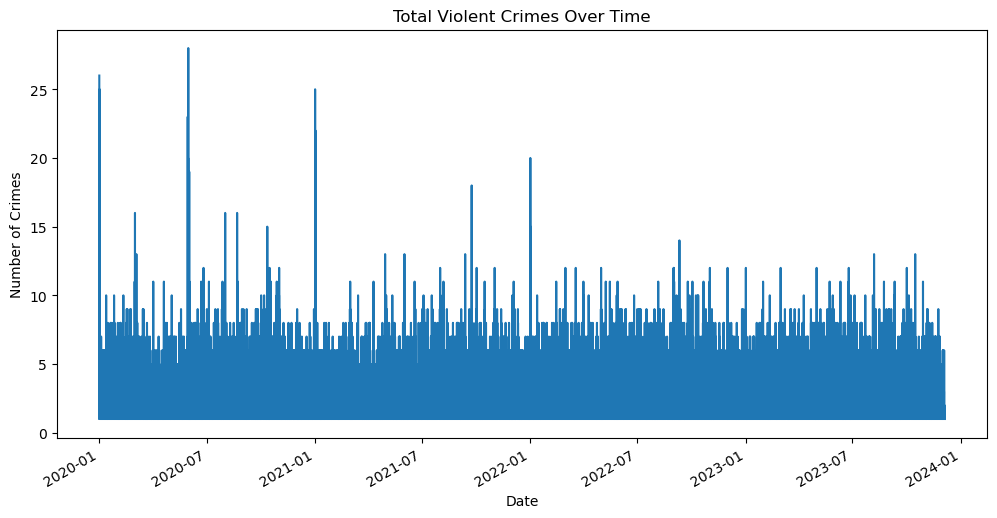

In [173]:
# Group by occurrence date and count the number of crimes per date
violent_crimes_by_date = violent_crimes_df.groupby('Occurence Date').size()

# Plot the total number of violent crimes over time
plt.figure(figsize=(12, 6))
violent_crimes_by_date.plot(kind='line')
plt.title('Total Violent Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(False)
plt.show()

In [174]:
# deep dive on property crimes over time
# Keywords indicating violent crimes
property_keywords = ['THEFT', 'BURGLARY', 'VANDALISM', 'VEHICLE - STOLEN','ARSON','PICKPOCKET', 'PROPERTY - DAMAGE']

# Create a mask based on the presence of keywords in the 'Crime Description' column
mask = crime_dict_df['Crime Description'].str.contains('|'.join(property_keywords), case=False)

# Filter out the rows corresponding to violent crimes
property_crimes = crime_dict_df[mask]

print(property_crimes)

                                     Crime Description
2             VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
5             SHOPLIFTING - PETTY THEFT ($950 & UNDER)
7    THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
8                                BURGLARY FROM VEHICLE
10                                               ARSON
12                  THEFT PLAIN - PETTY ($950 & UNDER)
13                                   THEFT OF IDENTITY
16                                            BURGLARY
17                                    VEHICLE - STOLEN
18     THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
21                                  BUNCO, GRAND THEFT
22                                       THEFT, PERSON
29   THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...
32                  THEFT FROM MOTOR VEHICLE - ATTEMPT
44                                 BURGLARY, ATTEMPTED
49          EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)
51        

In [175]:
property_crimes = [     "VANDALISM - MISDEAMEANOR ($399 OR UNDER)",
                        "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA",
                        "SHOPLIFTING - PETTY THEFT ($950 & UNDER)",
                        "THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL",
                        "BURGLARY FROM VEHICLE",
                        "ARSON",
                        "THEFT PLAIN - PETTY ($950 & UNDER)",
                        "THEFT OF IDENTITY",
                        "BURGLARY",
                        "VEHICLE - STOLEN",
                        "THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)",
                        "BUNCO, GRAND THEFT",
                        "THEFT, PERSON",
                        "THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)",
                        "THEFT FROM MOTOR VEHICLE - ATTEMPT",
                        "BURGLARY, ATTEMPTED",
                        "EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",
                        "BUNCO, PETTY THEFT",
                        'THEFT PLAIN - ATTEMPT',
                        "THEFT FROM PERSON - ATTEMPT",
                        "BURGLARY FROM VEHICLE, ATTEMPTED",
                        "PICKPOCKET",
                        "EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",
                        "DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER)",
                        "DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950)",
                        "DISHONEST EMPLOYEE - GRAND THEFT",
                        "TILL TAP - GRAND THEFT ($950.01 & OVER)",
                        "PETTY THEFT - AUTO REPAIR",
                        "THEFT, COIN MACHINE - GRAND ($950.01 & OVER)",
                        "GRAND THEFT / INSURANCE FRAUD",
                        "DISHONEST EMPLOYEE - PETTY THEFT",
                        "THEFT, COIN MACHINE - ATTEMPT",
                        "THEFT, COIN MACHINE - PETTY ($950 & UNDER)",
                        "GRAND THEFT / AUTO REPAIR",
                        "PICKPOCKET, ATTEMPT",
                        "TELEPHONE PROPERTY - DAMAGE",
                        "DISHONEST EMPLOYEE ATTEMPTED THEFT",
                        'BOAT - STOLEN',
                        'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)',
                        'PURSE SNATCHING',
                        'BIKE - STOLEN']

# Filter the dataset to include only the violent crimes
property_crimes_df = filtered_data_df[filtered_data_df['Crime Description'].isin(property_crimes)]

# Convert occurrence date to datetime if not already
property_crimes_df['Occurence Date'] = pd.to_datetime(property_crimes_df['Occurence Date'])

# Sort by occurrence date
property_crimes_df = property_crimes_df.sort_values(by='Occurence Date')

# Display the first few rows of the resulting dataframe
property_crimes_df.head()


/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_66936/230894693.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_crimes_df['Occurence Date'] = pd.to_datetime(property_crimes_df['Occurence Date'])


Division Number Report Date      Occurence Date  area     Precinct  \
198066        220706833  2022-03-16 2020-01-01 00:01:00     7     Wilshire   
149361        201214987  2020-06-20 2020-01-01 00:01:00    12  77th Street   
190027        201419371  2020-10-28 2020-01-01 00:01:00    14      Pacific   
198582        231309161  2023-04-07 2020-01-01 00:01:00    13       Newton   
77924         201004051  2020-01-02 2020-01-01 00:01:00    10  West Valley   

        Reporting District  part  Crime Code  \
198066                 782     2         668   
149361                1267     1         420   
190027                1453     2         354   
198582                1383     2         354   
77924                 1008     2         745   

                                      Crime Description Modus Operandi  \
198066       EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)        Unknown   
149361  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)        Unknown   
190027                                THEFT OF IDENTITY           1822   
198582                                THEFT OF IDENTITY           0100   
77924          VANDALISM - MISDEAMEANOR ($399 OR UNDER)      0329 1609   

        Victime Age Victim Sex Victime Descent premise_code  \
198066            0    Unknown         Unknown        203.0   
149361            0    Unknown         Unknown        101.0   
190027           28          M               W        501.0   
198582           45          M               H        750.0   
77924             0          M               W        203.0   

           Premise Description weapon_code Weapon Description status  \
198066          OTHER BUSINESS     Unknown            Unknown     IC   
149361                  STREET     Unknown            Unknown     IC   
190027  SINGLE FAMILY DWELLING     Unknown            Unknown     IC   
198582              CYBERSPACE     Unknown            Unknown     IC   
77924           OTHER BUSINESS     Unknown            Unknown     IC   

       Status Description Crime Code 1 Crime Code 2 Crime Code 3 Crime Code 4  \
198066        Invest Cont        668.0      Unknown      Unknown      Unknown   
149361        Invest Cont        420.0      Unknown      Unknown      Unknown   
190027        Invest Cont        354.0      Unknown      Unknown      Unknown   
198582        Invest Cont        354.0      Unknown      Unknown      Unknown   
77924         Invest Cont        745.0      Unknown      Unknown      Unknown   

                                       Location cross_street  Latitude  \
198066  1800 S  FAIRFAX                      AV      Unknown   34.0431   
149361   300 W  84TH                         PL      Unknown   33.9624   
190027  4000    REDWOOD                      AV      Unknown   33.9906   
198582   200 W  62ND                         ST      Unknown   33.9833   
77924   7200    HAYVENHURST                  AV      Unknown   34.2012   

        Longitude  Year Month  Month/Year  
198066  -118.3692  2020   Jan  2020-01-01  
149361  -118.2783  2020   Jan  2020-01-01  
190027  -118.4391  2020   Jan  2020-01-01  
198582  -118.2765  2020   Jan  2020-01-01  
77924   -118.4924  2020   Jan  2020-01-01

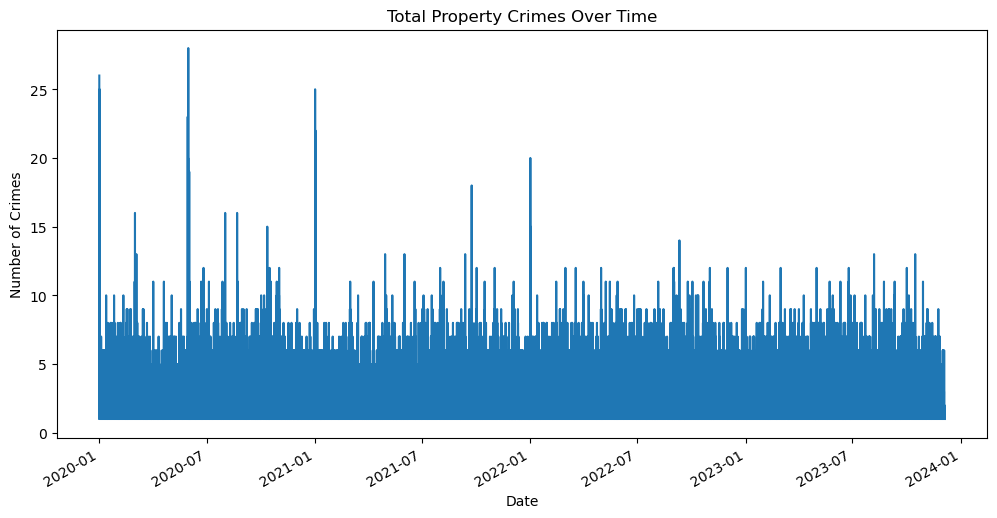

In [176]:
# Group by occurrence date and count the number of crimes per date
property_crimes_by_date = property_crimes_df.groupby('Occurence Date').size()



# Plot the total number of violent crimes over time
plt.figure(figsize=(12, 6))
violent_crimes_by_date.plot(kind='line')
plt.title('Total Property Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(False)
plt.show()

In [177]:
# deep dive other crimes 
# violent keywords
violent_keywords = ['ASSAULT', 'RAPE', 'ROBBERY', 'HOMICIDE', 'LYNCHING','BATTERY','SHOTS','SEX, UNLAWFUL', 'SHOTS FIRED']


# property keywords 
property_keywords = ['THEFT', 'BURGLARY', 'VANDALISM', 'BOAT - STOLEN','VEHICLE - STOLEN','ARSON','PICKPOCKET', 'PROPERTY - DAMAGE']

# create masks
violent_mask = crime_dict_df['Crime Description'].str.contains('|'.join(violent_keywords), case=False)
property_mask = crime_dict_df['Crime Description'].str.contains('|'.join(property_keywords), case=False)

# Filter out rows corresponding to violent and property crimes
other_crimes = crime_dict_df[~(violent_mask | property_mask)]

print(other_crimes)

                                     Crime Description
1            SEX OFFENDER REGISTRANT OUT OF COMPLIANCE
6                            OTHER MISCELLANEOUS CRIME
9               CRIMINAL THREATS - NO WEAPON DISPLAYED
19                                     BRANDISH WEAPON
24                                       BIKE - STOLEN
..                                                 ...
132                                FAILURE TO DISPERSE
133  FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS ...
134       INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)
135                     BLOCKING DOOR INDUCTION CENTER
136                                    INCITING A RIOT

[78 rows x 1 columns]


In [178]:
other_crimes_list = other_crimes['Crime Description'].tolist()
print(other_crimes_list)

['SEX OFFENDER REGISTRANT OUT OF COMPLIANCE', 'OTHER MISCELLANEOUS CRIME', 'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'BRANDISH WEAPON', 'BIKE - STOLEN', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD', 'VIOLATION OF COURT ORDER', 'TRESPASSING', 'VIOLATION OF RESTRAINING ORDER', 'DISTURBING THE PEACE', 'THROWING OBJECT AT MOVING VEHICLE', 'EXTORTION', 'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 'CHILD STEALING', 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 'BOMB SCARE', 'DOCUMENT FORGERY / STOLEN FELONY', 'SEXUAL PENETRATION W/FOREIGN OBJECT', 'FAILURE TO YIELD', 'PURSE SNATCHING', 'INDECENT EXPOSURE', 'ORAL COPULATION', 'VIOLATION OF TEMPORARY RESTRAINING ORDER', 'KIDNAPPING - GRAND ATTEMPT', 'RESISTING ARREST', 'THREATENING PHONE CALLS/LETTERS', 'KIDNAPPING', 'LEWD/LASCIVIOUS ACTS WITH CHILD', 'LEWD CONDUCT', 'UNAUTHORIZED COMPUTER ACCESS', 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH', 'CHILD NEGLECT (SEE 300 W.I.C.)', 'CONTEMPT OF COURT', 'CHILD 

In [179]:
# OTHER CRIMES DF
other_crimes = ['SEX OFFENDER REGISTRANT OUT OF COMPLIANCE', 'OTHER MISCELLANEOUS CRIME',
                'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'BRANDISH WEAPON', 
                'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD', 
                'VIOLATION OF COURT ORDER', 'TRESPASSING', 'VIOLATION OF RESTRAINING ORDER', 
                'DISTURBING THE PEACE', 'THROWING OBJECT AT MOVING VEHICLE', 'EXTORTION', 
                'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 'CHILD STEALING', 
                'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 'BOMB SCARE', 
                'DOCUMENT FORGERY / STOLEN FELONY', 'SEXUAL PENETRATION W/FOREIGN OBJECT',
                'FAILURE TO YIELD', 'INDECENT EXPOSURE', 'ORAL COPULATION',
                'VIOLATION OF TEMPORARY RESTRAINING ORDER', 'KIDNAPPING - GRAND ATTEMPT', 
                'RESISTING ARREST', 'THREATENING PHONE CALLS/LETTERS', 'KIDNAPPING',
                'LEWD/LASCIVIOUS ACTS WITH CHILD', 'LEWD CONDUCT', 'UNAUTHORIZED COMPUTER ACCESS',
                'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH', 
                'CHILD NEGLECT (SEE 300 W.I.C.)', 'CONTEMPT OF COURT', 'CHILD ANNOYING (17YRS & UNDER)',
                'BUNCO, ATTEMPT', 'PIMPING', 'STALKING', 'SHOPLIFTING - ATTEMPT', 'VEHICLE - ATTEMPT STOLEN',
                'FALSE IMPRISONMENT', 'COUNTERFEIT', 'CREDIT CARDS, FRAUD USE ($950 & UNDER',
                'DOCUMENT WORTHLESS ($200 & UNDER)', 'PROWLER', 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS', 
                'CHILD PORNOGRAPHY', 'PEEPING TOM', 'TILL TAP - PETTY ($950 & UNDER)', 
                'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)', 
                'DRIVING WITHOUT OWNER CONSENT (DWOC)', 'DOCUMENT WORTHLESS ($200.01 & OVER)', 'PANDERING', 
                'CRUELTY TO ANIMALS', 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)', 'ILLEGAL DUMPING', 
                'MANSLAUGHTER, NEGLIGENT', 'RECKLESS DRIVING', 'PURSE SNATCHING - ATTEMPT',
                'FALSE POLICE REPORT', 'CONSPIRACY', 'CONTRIBUTING',
                'WEAPONS POSSESSION/BOMBING', 'BRIBERY', 'DISRUPT SCHOOL', 
                'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)', 
                'DRUGS, TO A MINOR', 'DRUNK ROLL', 'CHILD ABANDONMENT', 
                'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM', 'BIGAMY', 
                'FAILURE TO DISPERSE', 'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)',
                'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)', 'BLOCKING DOOR INDUCTION CENTER', 
                'INCITING A RIOT']


# Filter the dataset to include only the other crimes
other_crimes_df = filtered_data_df[filtered_data_df['Crime Description'].isin(other_crimes)]

# Convert occurrence date to datetime if not already
other_crimes_df['Occurence Date'] = pd.to_datetime(other_crimes_df['Occurence Date'])

# Sort by occurrence date
other_crimes_df = other_crimes_df.sort_values(by='Occurence Date')

# Display the first few rows of the resulting dataframe
other_crimes_df.head()

/var/folders/ry/_22269n950s4yfgx8rkg1p0m0000gn/T/ipykernel_66936/301912886.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_crimes_df['Occurence Date'] = pd.to_datetime(other_crimes_df['Occurence Date'])


Division Number Report Date      Occurence Date  area   Precinct  \
107181        202018106  2020-11-17 2020-01-01 00:01:00    20    Olympic   
174091        201808334  2020-03-17 2020-01-01 00:01:00    18  Southeast   
198751        230905903  2023-02-20 2020-01-01 00:01:00     9   Van Nuys   
198728        220611873  2022-06-15 2020-01-01 00:01:00     6  Hollywood   
13315         221809175  2022-03-25 2020-01-01 00:01:00    18  Southeast   

        Reporting District  part  Crime Code  \
107181                2036     2         760   
174091                1832     2         845   
198751                 952     2         812   
198728                 666     2         237   
13315                 1864     1         815   

                                        Crime Description  \
107181                    LEWD/LASCIVIOUS ACTS WITH CHILD   
174091          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE   
198751  CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...   
198728                     CHILD NEGLECT (SEE 300 W.I.C.)   
13315                 SEXUAL PENETRATION W/FOREIGN OBJECT   

                                      Modus Operandi  Victime Age Victim Sex  \
107181                 0500 1259 0522 0510 0913 0360           11          F   
174091                                          0500            0          X   
198751                 0913 1402 1415 0602 0552 1258            7          F   
198728                           1259 0913 1801 0553           15          M   
13315   0913 1258 1251 2024 0360 0602 0522 0515 0531           10          F   

       Victime Descent premise_code  \
107181               H        102.0   
174091               X        501.0   
198751               O        502.0   
198728               H        502.0   
13315                B        501.0   

                                 Premise Description weapon_code  \
107181                                      SIDEWALK     Unknown   
174091                        SINGLE FAMILY DWELLING     Unknown   
198751  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)       400.0   
198728  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     Unknown   
13315                         SINGLE FAMILY DWELLING       400.0   

                                    Weapon Description status  \
107181                                         Unknown     IC   
174091                                         Unknown     AO   
198751  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC   
198728                                         Unknown     AA   
13315   STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     JA   

       Status Description Crime Code 1 Crime Code 2 Crime Code 3 Crime Code 4  \
107181        Invest Cont        760.0      Unknown      Unknown      Unknown   
174091        Adult Other        845.0      Unknown      Unknown      Unknown   
198751        Invest Cont        812.0        860.0        998.0      Unknown   
198728       Adult Arrest        237.0      Unknown      Unknown      Unknown   
13315          Juv Arrest        812.0        815.0      Unknown      Unknown   

                                        Location cross_street  Latitude  \
107181    700 S  CATALINA                     ST      Unknown   34.0580   
174091    100 W  108TH                        ST      Unknown   33.9401   
198751  15300    WEDDINGTON                   ST      Unknown   34.1667   
198728   1100    VINE                         ST      Unknown   34.0907   
13315    1100 E  118TH                        ST      Unknown   33.9267   

        Longitude  Year Month  Month/Year  
107181  -118.2954  2020   Jan  2020-01-01  
174091  -118.2761  2020   Jan  2020-01-01  
198751  -118.4662  2020   Jan  2020-01-01  
198728  -118.3266  2020   Jan  2020-01-01  
13315   -118.2566  2020   Jan  2020-01-01

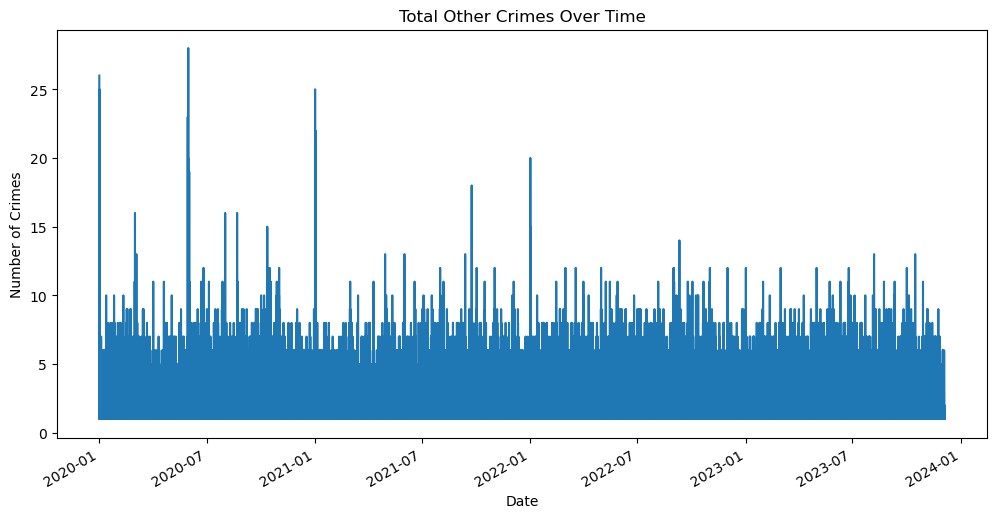

In [180]:
# Group by occurrence date and count the number of crimes per date
other_crimes_by_date = other_crimes_df.groupby('Occurence Date').size()



# Plot the total number of violent crimes over time
plt.figure(figsize=(12, 6))
violent_crimes_by_date.plot(kind='line')
plt.title('Total Other Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(False)
plt.show()

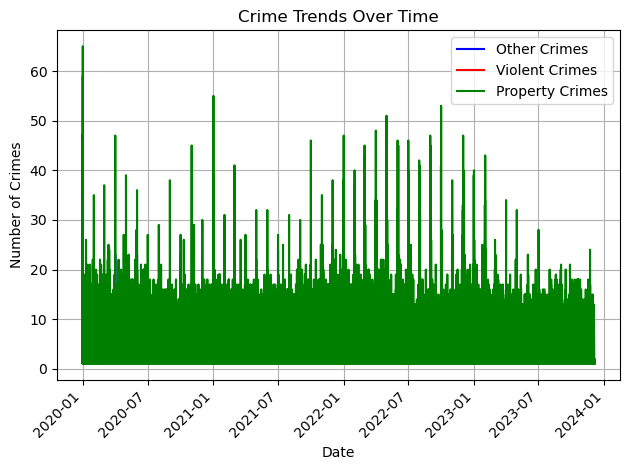

In [181]:
# Convert 'Occurrence Date' to datetime if it's not already in datetime format
other_crimes_df['Occurence Date'] = pd.to_datetime(other_crimes_df['Occurence Date'])
violent_crimes_df['Occurence Date'] = pd.to_datetime(violent_crimes_df['Occurence Date'])
property_crimes_df['Occurence Date'] = pd.to_datetime(property_crimes_df['Occurence Date'])

# Plotting the data
plt.plot(kind='line', figsize=(12, 6))
other_crimes_df.groupby('Occurence Date').size().plot(label='Other Crimes', color='blue')
violent_crimes_df.groupby('Occurence Date').size().plot(label='Violent Crimes', color='red')
property_crimes_df.groupby('Occurence Date').size().plot(label='Property Crimes', color='green')

# Adding labels and title
plt.title('Crime Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the plot
plt.show()

In [182]:
violent_crimes_df.dtypes


Division Number                 int64
Report Date                    object
Occurence Date         datetime64[ns]
area                            int64
Precinct                       object
Reporting District              int64
part                            int64
Crime Code                      int64
Crime Description              object
Modus Operandi                 object
Victime Age                     int64
Victim Sex                     object
Victime Descent                object
premise_code                   object
Premise Description            object
weapon_code                    object
Weapon Description             object
status                         object
Status Description             object
Crime Code 1                   object
Crime Code 2                   object
Crime Code 3                   object
Crime Code 4                   object
Location                       object
cross_street                   object
Latitude                      float64
Longitude   

In [183]:
# violent crimes by month year to plot
violent_crimes_by_month_year = violent_crimes_df.groupby('Month/Year').size().reset_index(name='Count')
violent_crimes_by_month_year.head()



Month/Year  Count
0  2020-01-01   4966
1  2020-02-01   4636
2  2020-03-01   4416
3  2020-04-01   4209
4  2020-05-01   4739

In [184]:
# property crimes by month year to plot
property_crimes_by_month_year = property_crimes_df.groupby('Month/Year').size().reset_index(name='Count')
property_crimes_by_month_year.head()

Month/Year  Count
0  2020-01-01   9329
1  2020-02-01   8598
2  2020-03-01   8145
3  2020-04-01   8069
4  2020-05-01   8737

In [185]:
# other crimes by month year to plot
other_crimes_by_month_year = other_crimes_df.groupby('Month/Year').size().reset_index(name='Count')
other_crimes_by_month_year.head()

Month/Year  Count
0  2020-01-01   2433
1  2020-02-01   2294
2  2020-03-01   2039
3  2020-04-01   2024
4  2020-05-01   2115

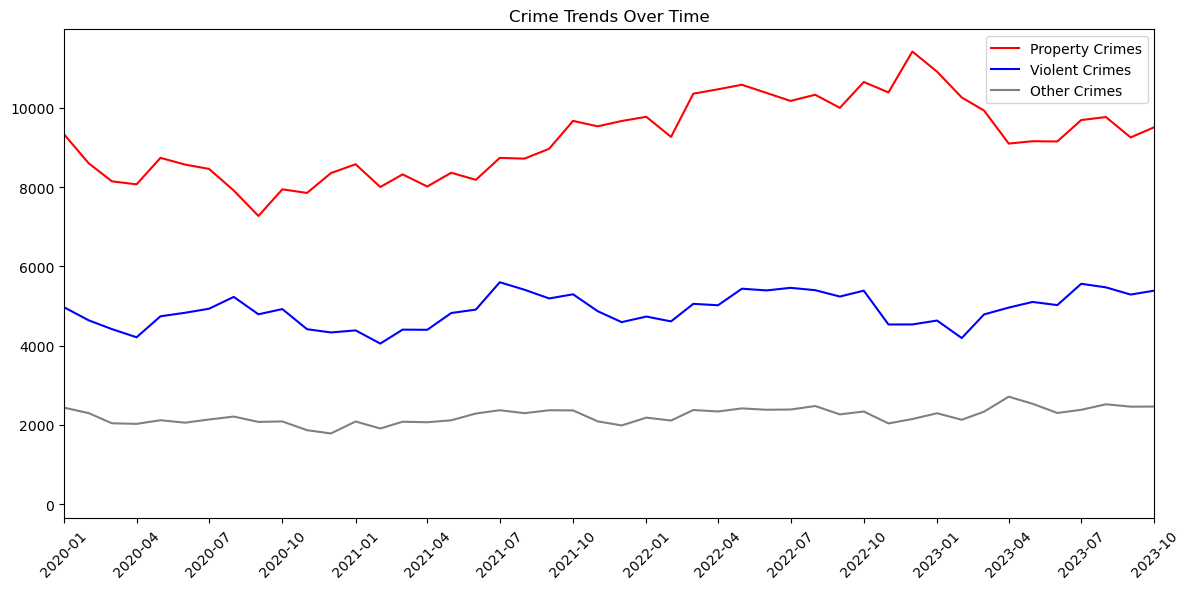

In [186]:
#
# Convert 'Month/Year' column to datetime format
violent_crimes_by_month_year['Month/Year'] = pd.to_datetime(violent_crimes_by_month_year['Month/Year'])
property_crimes_by_month_year['Month/Year'] = pd.to_datetime(property_crimes_by_month_year['Month/Year'])
other_crimes_by_month_year['Month/Year'] = pd.to_datetime(other_crimes_by_month_year['Month/Year'])

# Plotting the data
plt.figure(figsize=(12, 6))

plt.plot(property_crimes_by_month_year['Month/Year'], property_crimes_by_month_year['Count'], label='Property Crimes', color='red')
plt.plot(violent_crimes_by_month_year['Month/Year'], violent_crimes_by_month_year['Count'], label='Violent Crimes', color='blue')
plt.plot(other_crimes_by_month_year['Month/Year'], other_crimes_by_month_year['Count'], label='Other Crimes', color='grey')

# Adding labels and title
plt.title('Crime Trends Over Time')
# plt.xlabel('Month/Year')
# plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(False)

# Set ticks at each quarter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Format the date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Limit the x-axis to end at October 2023
plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2023-10-01'))

plt.xticks(rotation=45)
plt.tight_layout()
# plt.box(False)

# Displaying the plot
plt.show()

In [ ]:
#..........................................................................................


In [45]:
!pip install folium


In [46]:
# Checking for missing values in each column
missing_values = clean_data_df.isnull().sum()
print(missing_values)

# Displaying missing values
print("\nMissing values in each column:")
print(missing_values)


Division Number        0
Report Date            0
Occurence Date         0
Precinct               0
Reporting District     0
Crime Code             0
Crime Description      0
Modus Operandi         0
Victime Age            0
Victim Sex             0
Victime Descent        0
Premise Description    0
Weapon Description     0
Status Description     0
Crime Code 1           0
Crime Code 2           0
Crime Code 3           0
Crime Code 4           0
Location               0
Latitude               0
longitude              0
Month/Year             0
dtype: int64

Missing values in each column:
Division Number        0
Report Date            0
Occurence Date         0
Precinct               0
Reporting District     0
Crime Code             0
Crime Description      0
Modus Operandi         0
Victime Age            0
Victim Sex             0
Victime Descent        0
Premise Description    0
Weapon Description     0
Status Description     0
Crime Code 1           0
Crime Code 2           0
Crime

In [47]:
# Checking for duplicate entries
duplicate_rows = clean_data_df.duplicated().sum()
print("Number of duplicate entries:", duplicate_rows)


Number of duplicate entries: 0


In [48]:
# Check column names
print("Column names:", clean_data_df.columns)

# Alternatively, you can also use .info() to display column names along with other information
clean_data_df.info()


Column names: Index(['Division Number', 'Report Date', 'Occurence Date', 'Precinct',
       'Reporting District', 'Crime Code', 'Crime Description',
       'Modus Operandi', 'Victime Age', 'Victim Sex', 'Victime Descent',
       'Premise Description', 'Weapon Description', 'Status Description',
       'Crime Code 1', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4',
       'Location', 'Latitude', 'longitude', 'Month/Year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Division Number      852950 non-null  int64         
 1   Report Date          852950 non-null  datetime64[ns]
 2   Occurence Date       852950 non-null  object        
 3   Precinct             852950 non-null  object        
 4   Reporting District   852950 non-null  int64         
 5   Crime Code           852950 no

In [49]:
# Convert date columns to datetime
clean_data_df['Report Date'] = pd.to_datetime(clean_data_df['Report Date'], format='%Y-%m-%d')
clean_data_df['Occurrence Date'] = pd.to_datetime(clean_data_df['Occurrence Date'], format='%Y-%m-%d')
clean_data_df.head()


KeyError: 'Occurrence Date'

In [50]:
# Convert date columns to datetime
clean_data_df['Report Date'] = pd.to_datetime(clean_data_df['Report Date'], format='%Y-%m-%d')
clean_data_df['Occurence Date'] = pd.to_datetime(clean_data_df['Occurence Date'], format='%Y-%m-%d')
clean_data_df.head()


ValueError: unconverted data remains when parsing with format "%Y-%m-%d": " 22:30:00", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Convert date columns to datetime
clean_data_df['Report Date'] = pd.to_datetime(clean_data_df['Report Date'], format='%Y-%m-%d %H:%M:%S')
clean_data_df['Occurence Date'] = pd.to_datetime(clean_data_df['Occurence Date'], format='%Y-%m-%d %H:%M:%S')
clean_data_df.head()


In [ ]:
# Create a column for Year and Month
clean_data_df['Year'] = clean_data_df['Occurrence Date'].dt.year
clean_data_df['Month'] = clean_data_df['Occurrence Date'].dt.month


In [ ]:
# Create a column for Year and Month
clean_data_df['Year'] = clean_data_df['Occurrence Date'].dt.year
clean_data_df['Month'] = clean_data_df['Occurrence Date'].dt.month


In [ ]:
print(clean_data_df.columns)


In [ ]:
# Create a column for Year and Month
clean_data_df['Year'] = clean_data_df['Occurence Date'].dt.year
clean_data_df['Month'] = clean_data_df['Occurence Date'].dt.month


In [51]:
top_ten_crimes = clean_data_df['Crime Description'].value_counts().head(10)
top_ten_crimes


Crime Description
VEHICLE - STOLEN                                           91473
BATTERY - SIMPLE ASSAULT                                   67976
THEFT OF IDENTITY                                          53467
BURGLARY FROM VEHICLE                                      52611
BURGLARY                                                   51961
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    51826
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             48876
THEFT PLAIN - PETTY ($950 & UNDER)                         43402
INTIMATE PARTNER - SIMPLE ASSAULT                          42729
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            32875
Name: count, dtype: int64

In [52]:
print(clean_data_df.columns)


Index(['Division Number', 'Report Date', 'Occurence Date', 'Precinct',
       'Reporting District', 'Crime Code', 'Crime Description',
       'Modus Operandi', 'Victime Age', 'Victim Sex', 'Victime Descent',
       'Premise Description', 'Weapon Description', 'Status Description',
       'Crime Code 1', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4',
       'Location', 'Latitude', 'longitude', 'Month/Year'],
      dtype='object')


In [53]:
clean_data_df['Precinct'].nunique()


21

In [ ]:
clean_data_df['Precinct'].nunique()


In [ ]:
clean_data_df['Precinct'].nunique()


In [ ]:
clean_data_df['Month/Year'] = pd.to_datetime(clean_data_df['Month/Year'], format='%Y-%m')


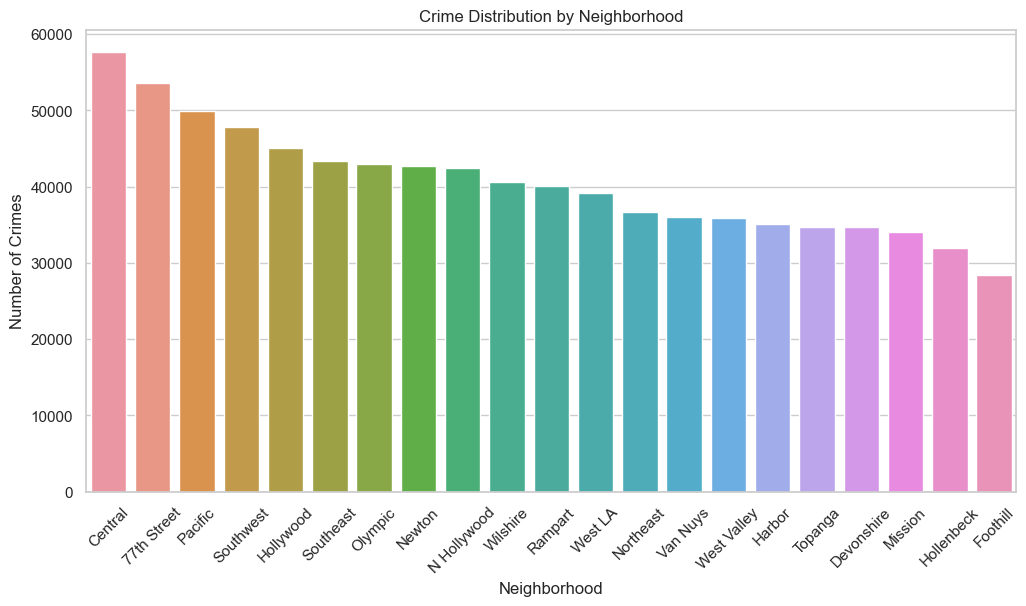

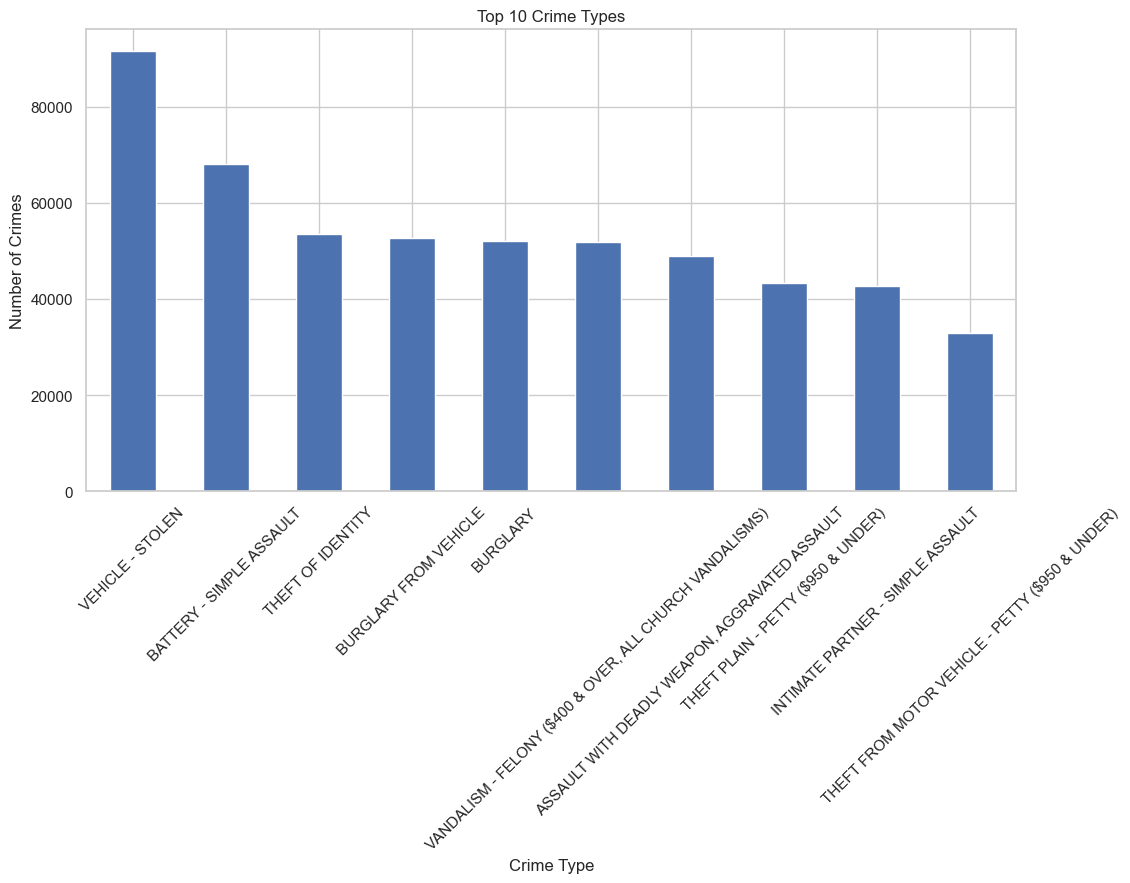

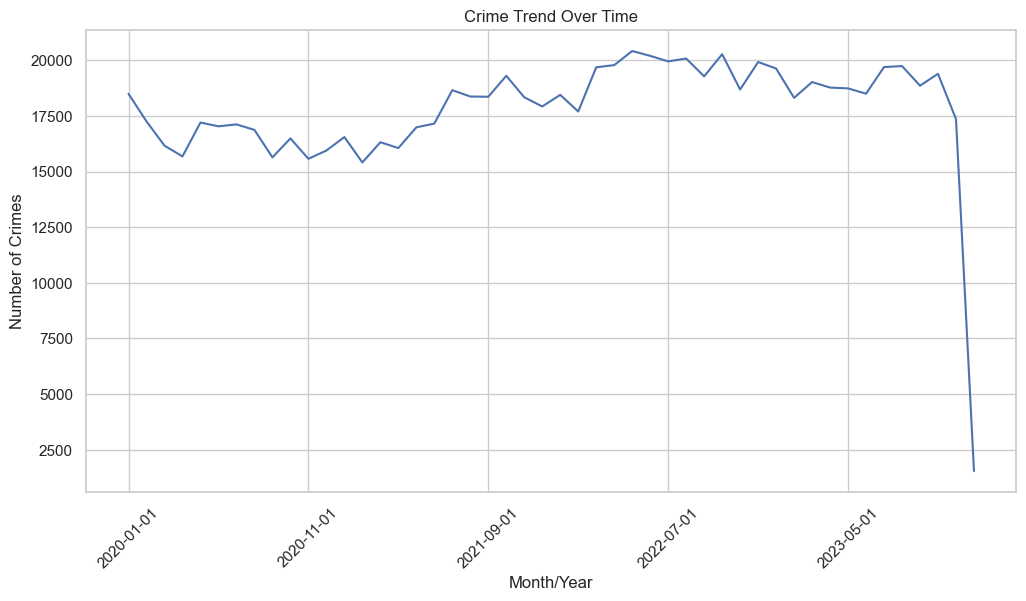

KeyError: 'Victim Descent'

<Figure size 1200x600 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Set seaborn style
sns.set(style="whitegrid")

# Visualization 1: Crime Distribution by Neighborhood (Bar Chart)
plt.figure(figsize=(12, 6))
sns.countplot(data=clean_data_df, x='Precinct', order=clean_data_df['Precinct'].value_counts().index)
plt.title('Crime Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Top Crime Types (Bar Chart)
top_crimes = clean_data_df['Crime Description'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_crimes.plot(kind='bar')
plt.title('Top 10 Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

# Visualization 3: Crime Trend Over Time (Line Plot)
plt.figure(figsize=(12, 6))
clean_data_df['Month/Year'].value_counts().sort_index().plot()
plt.title('Crime Trend Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

# Visualization 4: Victim Demographics (Pie Chart)
plt.figure(figsize=(12, 6))
clean_data_df['Victim Descent'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Victims by Descent')
plt.ylabel('')
plt.show()

# Visualization 5: Heatmap
crime_heatmap = folium.Map(location=[34.0522, -118.2437], zoom_start=10)
HeatMap(clean_data_df[['Latitude', 'Longitude']]).add_to(crime_heatmap)
crime_heatmap.save('crime_heatmap.html')


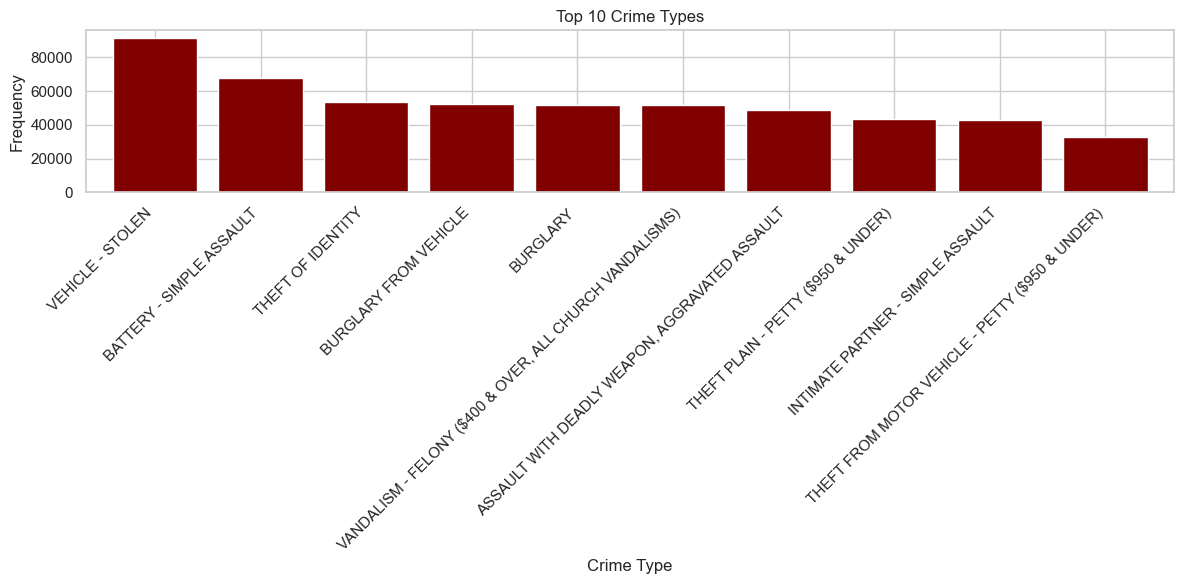

In [84]:
import matplotlib.pyplot as plt

# Crime Type Analysis
crime_type_counts = clean_data_df['Crime Description'].value_counts().head(10)

# Define a maroon color
bar_color = 'maroon'

plt.figure(figsize=(12, 6))  # Make the figure longer
crime_type_counts.plot(kind='bar', color=bar_color, width=0.8)  # Adjust width of bars
plt.title('Top 10 Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment of x-axis labels
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


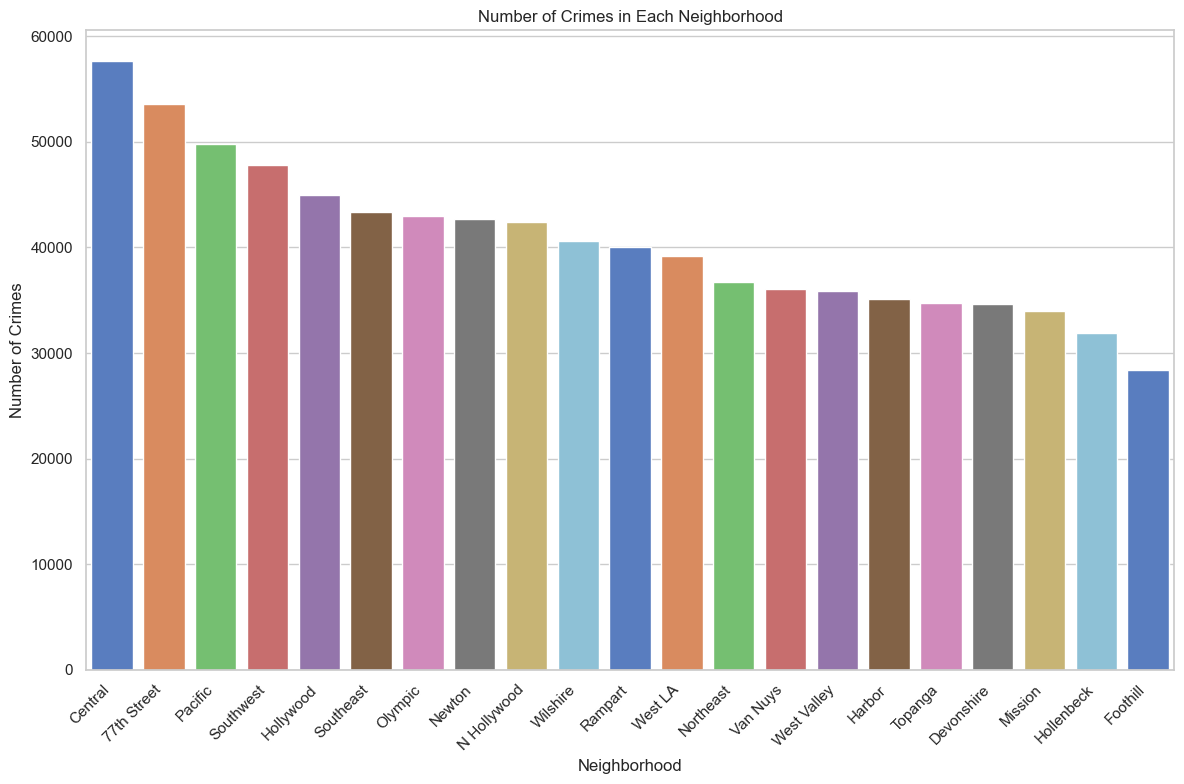

In [59]:
# Neighborhood Analysis
neighborhood_analysis = clean_data_df['Precinct'].value_counts().reset_index()
neighborhood_analysis.columns = ['Precinct', 'Crime Count']

# Visualizing neighborhood analysis
plt.figure(figsize=(12, 8))
sns.barplot(data=neighborhood_analysis, x='Precinct', y='Crime Count', palette='muted')
plt.title('Number of Crimes in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming clean_data_df contains your cleaned dataset with latitude and longitude columns
# Group data by latitude and longitude and count the occurrences of each location
crime_counts = clean_data_df.groupby(['Latitude', 'Longitude']).size().reset_index(name='Crime Count')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.kdeplot(data=crime_counts, x='Longitude', y='Latitude', fill=True, cmap='Reds', thresh=0.05)
plt.title('Crime Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


KeyError: 'Longitude'

C:\Users\Tasnia Wahid\AppData\Local\Temp\ipykernel_12400\2034517360.py:9: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv(r'C:\Users\Tasnia Wahid\Desktop\UCB Project-3\la_data (1).csv')


Index(['Division Number', 'Report Date', 'Occurence Date', 'Precinct',
       'Reporting District', 'Crime Code', 'Crime Description',
       'Modus Operandi', 'Victime Age', 'Victim Sex', 'Victime Descent',
       'Premise Description', 'Weapon Description', 'Status Description',
       'Crime Code 1', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4',
       'Location', 'Latitude', 'longitude', 'Month/Year'],
      dtype='object')


C:\Users\Tasnia Wahid\AppData\Local\Temp\ipykernel_12400\2034517360.py:24: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=crime_type_data[['longitude', 'Latitude']], cmap='Reds', shade=True, shade_lowest=False)
C:\Users\Tasnia Wahid\AppData\Local\Temp\ipykernel_12400\2034517360.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=crime_type_data[['longitude', 'Latitude']], cmap='Reds', shade=True, shade_lowest=False)


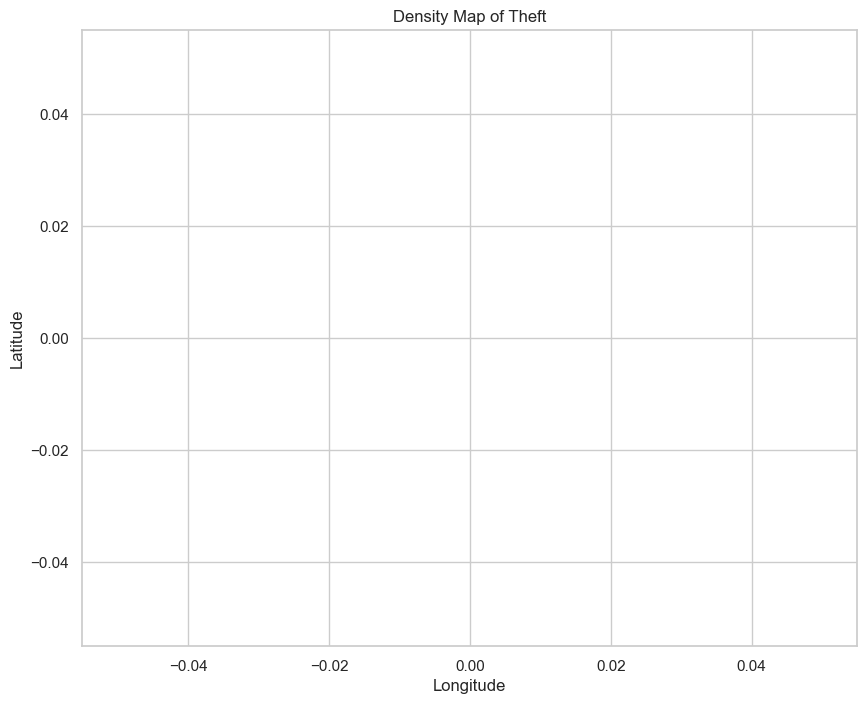

C:\Users\Tasnia Wahid\AppData\Local\Temp\ipykernel_12400\2034517360.py:24: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=crime_type_data[['longitude', 'Latitude']], cmap='Reds', shade=True, shade_lowest=False)
C:\Users\Tasnia Wahid\AppData\Local\Temp\ipykernel_12400\2034517360.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=crime_type_data[['longitude', 'Latitude']], cmap='Reds', shade=True, shade_lowest=False)


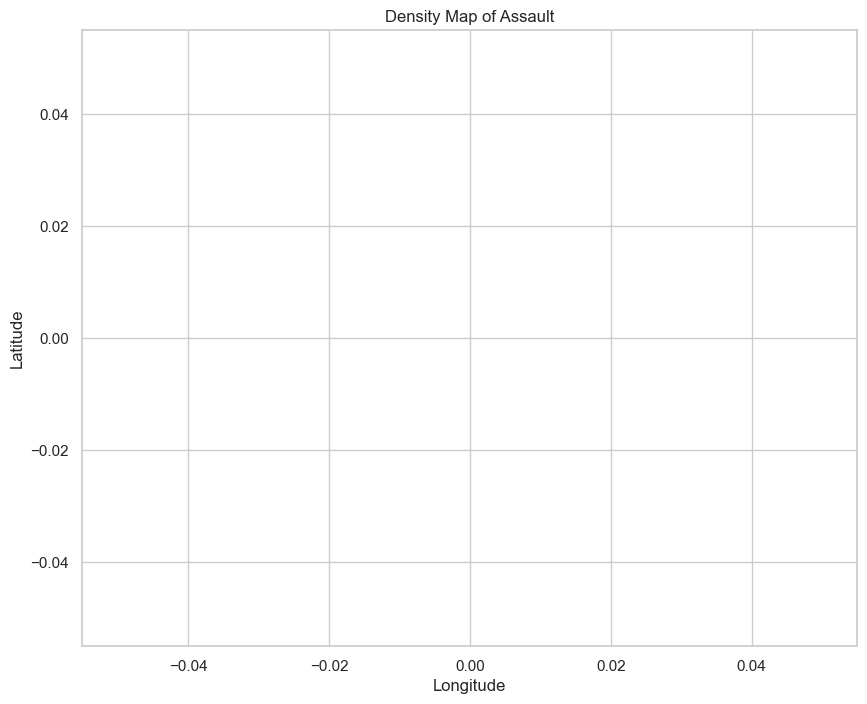

C:\Users\Tasnia Wahid\AppData\Local\Temp\ipykernel_12400\2034517360.py:24: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=crime_type_data[['longitude', 'Latitude']], cmap='Reds', shade=True, shade_lowest=False)
C:\Users\Tasnia Wahid\AppData\Local\Temp\ipykernel_12400\2034517360.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=crime_type_data[['longitude', 'Latitude']], cmap='Reds', shade=True, shade_lowest=False)


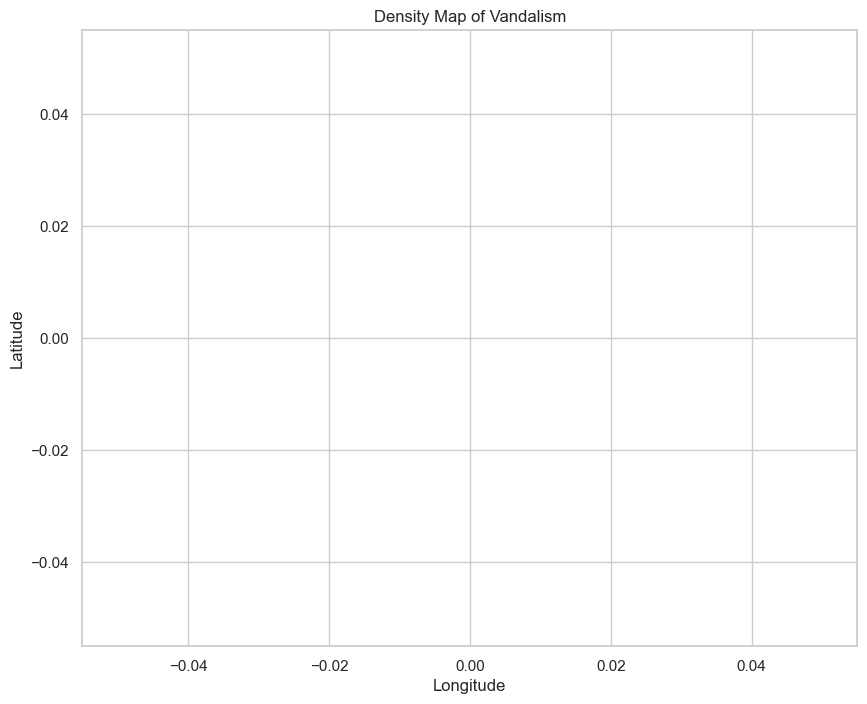

C:\Users\Tasnia Wahid\AppData\Local\Temp\ipykernel_12400\2034517360.py:33: RuntimeWarning: Mean of empty slice.
  map = folium.Map(location=[crime_locations[:,0].mean(), crime_locations[:,1].mean()], zoom_start=12)
C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: Location values cannot contain NaNs.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load your cleaned crime data
crime_data = pd.read_csv(r'C:\Users\Tasnia Wahid\Desktop\UCB Project-3\la_data (1).csv')

# Display the column names to identify the correct column name for longitude and latitude
print(crime_data.columns)

# Assuming the correct column names for longitude and latitude are 'longitude' and 'Latitude'
# Filter the data for specific crime types
crime_types = ['Theft', 'Assault', 'Vandalism']
filtered_data = crime_data[crime_data['Crime Code'].isin(crime_types)]

# Spatial Analysis
# Create Density Maps
for crime_type in crime_types:
    crime_type_data = filtered_data[filtered_data['Crime Code'] == crime_type]
    plt.figure(figsize=(10, 8))
    sns.kdeplot(data=crime_type_data[['longitude', 'Latitude']], cmap='Reds', shade=True, shade_lowest=False)
    plt.title(f'Density Map of {crime_type}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Spatial Clustering
# Example using Folium for visualization
crime_locations = filtered_data[['Latitude', 'longitude']].values
map = folium.Map(location=[crime_locations[:,0].mean(), crime_locations[:,1].mean()], zoom_start=12)
HeatMap(crime_locations).add_to(map)
map.save("crime_heatmap.html")

# Comparative Analysis
# Side-by-Side Maps
fig, axes = plt.subplots(1, len(crime_types), figsize=(15, 6))
for i, crime_type in enumerate(crime_types):
    crime_type_data = filtered_data[filtered_data['Crime Code'] == crime_type]
    sns.kdeplot(data=crime_type_data[['longitude', 'Latitude']], cmap='Reds', shade=True, shade_lowest=False, ax=axes[i])
    axes[i].set_title(f'Density Map of {crime_type}')
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')
plt.tight_layout()
plt.show()

# Overlay Analysis
plt.figure(figsize=(10, 8))
sns.kdeplot(data=filtered_data[['longitude', 'Latitude']], cmap='Reds', shade=True, shade_lowest=False)
plt.title('Overlay Density Map of Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [64]:
# Drop rows with NaN values in Latitude or Longitude columns
filtered_data = filtered_data.dropna(subset=['Latitude', 'longitude'])

# Spatial Clustering
# Example using Folium for visualization
crime_locations = filtered_data[['Latitude', 'longitude']].values
# Check if there are still NaN values in the crime_locations array
print(np.isnan(crime_locations).any())

# Create the map
map = folium.Map(location=[crime_locations[:,0].mean(), crime_locations[:,1].mean()], zoom_start=12)
HeatMap(crime_locations).add_to(map)
map.save("crime_heatmap.html")


False


C:\Users\Tasnia Wahid\AppData\Local\Temp\ipykernel_12400\2044365826.py:11: RuntimeWarning: Mean of empty slice.
  map = folium.Map(location=[crime_locations[:,0].mean(), crime_locations[:,1].mean()], zoom_start=12)
C:\Users\Tasnia Wahid\anaconda3\bootcamp\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: Location values cannot contain NaNs.

In [65]:
import seaborn as sns

# Bar plot of victim demographics
plt.figure(figsize=(12, 6))
sns.countplot(x='Victim Age', data=clean_data_df)
plt.title('Distribution of Crime Victims by Age')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Victim Sex', data=clean_data_df)
plt.title('Distribution of Crime Victims by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Victims')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Victim Descent', data=clean_data_df)
plt.title('Distribution of Crime Victims by Descent')
plt.xlabel('Descent')
plt.ylabel('Number of Victims')
plt.show()

# Bar plot of perpetrator demographics
plt.figure(figsize=(12, 6))
sns.countplot(x='Perpetrator Age', data=clean_data_df)
plt.title('Distribution of Crime Perpetrators by Age')
plt.xlabel('Age')
plt.ylabel('Number of Perpetrators')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Perpetrator Sex', data=clean_data_df)
plt.title('Distribution of Crime Perpetrators by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Perpetrators')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Perpetrator Descent', data=clean_data_df)
plt.title('Distribution of Crime Perpetrators by Descent')
plt.xlabel('Descent')
plt.ylabel('Number of Perpetrators')
plt.show()


ValueError: Could not interpret input 'Victim Age'

<Figure size 1200x600 with 0 Axes>

In [66]:
print(clean_data_df.columns)


Index(['Division Number', 'Report Date', 'Occurence Date', 'Precinct',
       'Reporting District', 'Crime Code', 'Crime Description',
       'Modus Operandi', 'Victime Age', 'Victim Sex', 'Victime Descent',
       'Premise Description', 'Weapon Description', 'Status Description',
       'Crime Code 1', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4',
       'Location', 'Latitude', 'longitude', 'Month/Year'],
      dtype='object')


In [67]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Victim Age', data=clean_data_df)
plt.title('Distribution of Crime Victims by Age')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.show()


ValueError: Could not interpret input 'Victim Age'

<Figure size 1200x600 with 0 Axes>

In [83]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load crime data
crime_data = pd.read_csv(r"C:\Users\Tasnia Wahid\Desktop\UCB Project-3\la_data (1).csv")  # Adjust the file path as per your dataset

# Create a folium map centered around the mean latitude and longitude of the crime locations
crime_map = folium.Map(location=[crime_data['Latitude'].mean(), crime_data['Longitude'].mean()], zoom_start=12)

# Create a HeatMap layer
heat_data = [[row['Latitude'], row['Longitude']] for index, row in crime_data.iterrows()]
HeatMap(heat_data).add_to(crime_map)

# Add title to the map
title_html = '<h3 align="center" style="font-size:20px"><b>Crime Heatmap</b></h3>'
crime_map.get_root().html.add_child(folium.Element(title_html))

# Display the map
crime_map


C:\Users\Tasnia Wahid\AppData\Local\Temp\ipykernel_12400\3127536209.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv(r"C:\Users\Tasnia Wahid\Desktop\UCB Project-3\la_data (1).csv")  # Adjust the file path as per your dataset


KeyError: 'Longitude'

In [133]:
# Temporal Analysis by Neighborhood
# Assuming 'Neighborhood' column exists in your DataFrame

# Extracting year and month from 'Occurrence Date' column
clean_data_df['Year'] = clean_data_df['Occurence Date'].dt.year
clean_data_df['Month'] = clean_data_df['Occurence Date'].dt.month

# Grouping by year, month, and neighborhood to count the number of crimes
temporal_analysis_neighborhood = clean_data_df.groupby(['Year', 'Month', 'Neighborhood']).size().reset_index(name='Crime Count')

# Visualizing temporal analysis by neighborhood
plt.figure(figsize=(12, 6))
sns.barplot(data=temporal_analysis_neighborhood, x='Year', y='Crime Count', hue='Neighborhood', palette='viridis')
plt.title('Number of Crimes Over Time by Neighborhood')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Neighborhood', bbox_to_anchor=(1, 1), loc='upper left')  # Adjust legend position
plt.grid(axis='y')  # Add grid lines only on the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

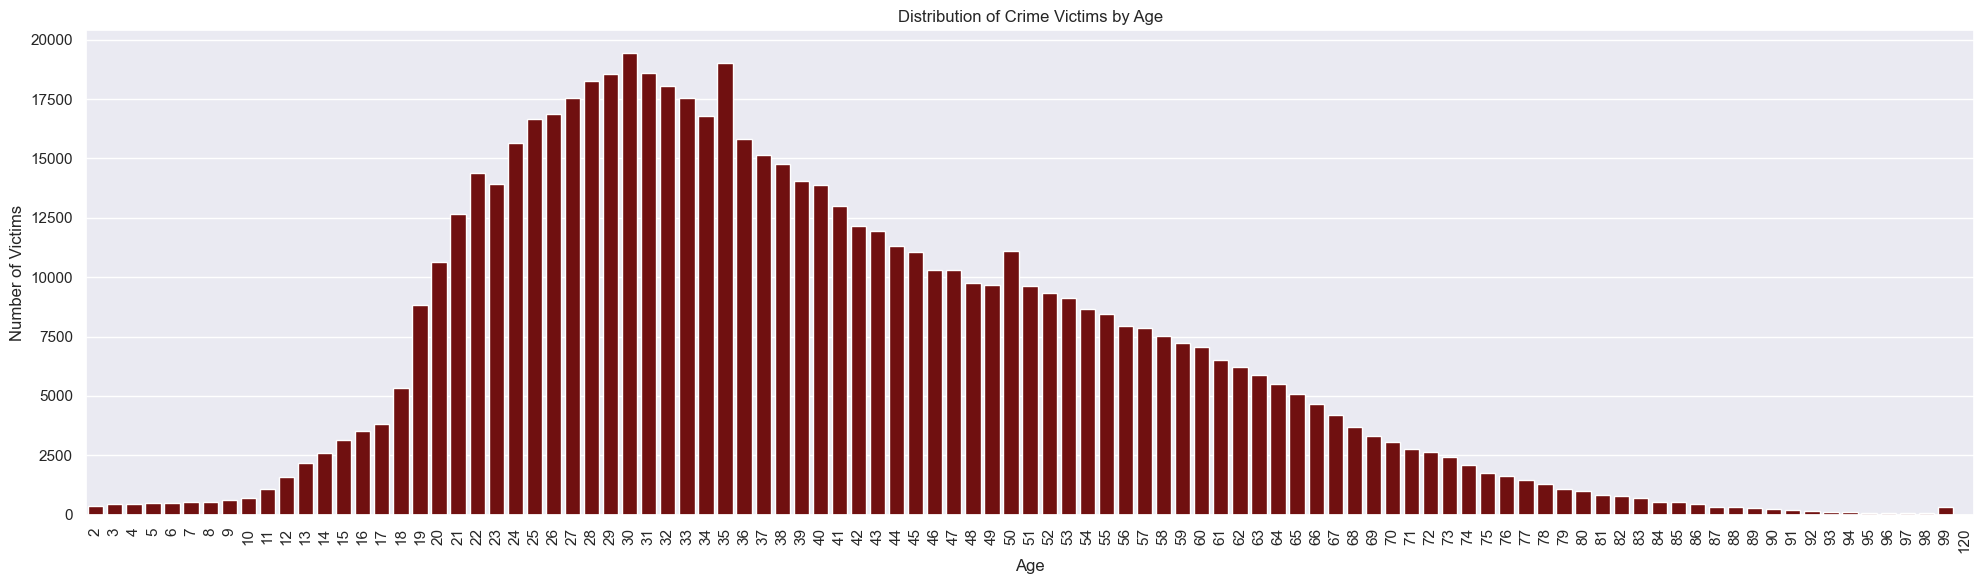

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the background style
sns.set_style("darkgrid")

# Filter out the data where Victim Age is not equal to 0 or less than 0
clean_data_df_filtered = clean_data_df[(clean_data_df['Victim Age'] != 0) & (clean_data_df['Victim Age'] > 0)]

# Plotting distribution of crime victims by age
plt.figure(figsize=(20, 6))
sns.countplot(x='Victim Age', data=clean_data_df_filtered, color='maroon')
plt.title('Distribution of Crime Victims by Age')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


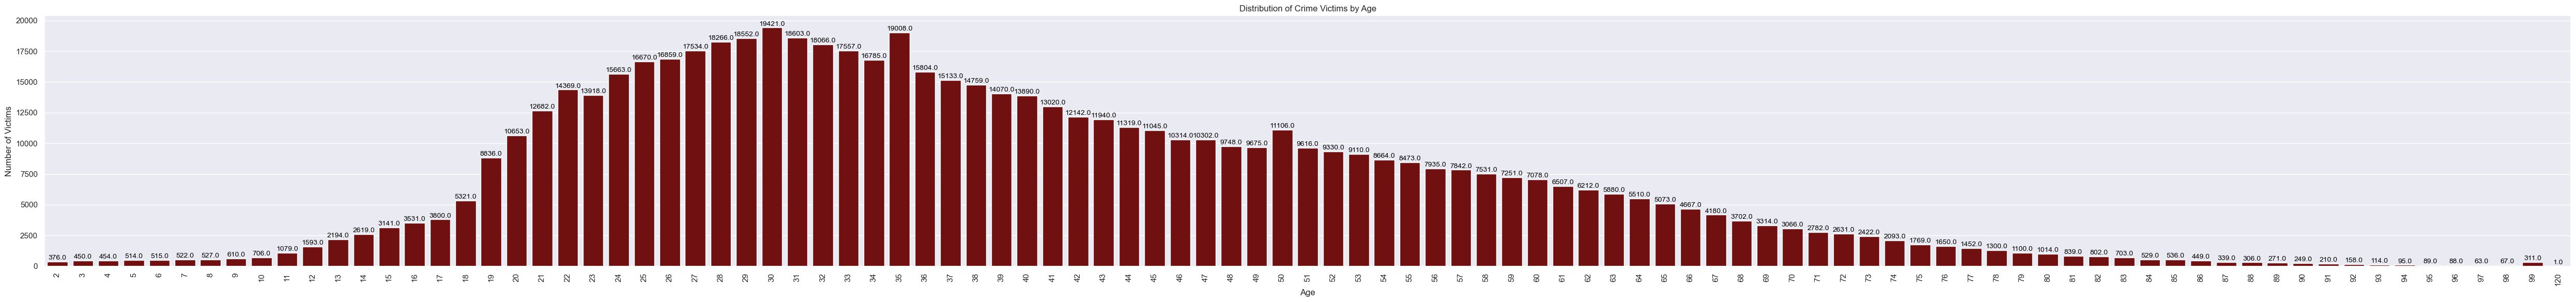

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the background style
sns.set_style("darkgrid")

# Filter out the data where Victim Age is not equal to 0 or less than 0
clean_data_df_filtered = clean_data_df[(clean_data_df['Victim Age'] != 0) & (clean_data_df['Victim Age'] > 0)]

# Plotting distribution of crime victims by age
plt.figure(figsize=(50, 6))
ax = sns.countplot(x='Victim Age', data=clean_data_df_filtered, color='maroon')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Crime Victims by Age')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


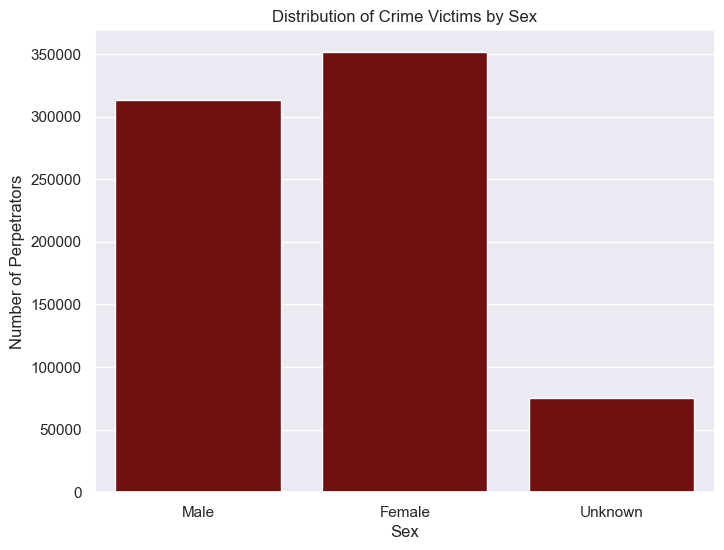

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming clean_data_df contains the cleaned dataset

# Filter the data to include only 'M', 'F', and 'X' in the 'Victim Sex' column
filtered_data = clean_data_df[clean_data_df['Victim Sex'].isin(['M', 'F', 'X'])]

# Define custom color palette
custom_palette = {'M': 'maroon', 'F': 'maroon', 'X': 'maroon'}

# Define custom x-axis labels
custom_labels = {'M': 'Male', 'F': 'Female', 'X': 'Unknown'}

# Plotting distribution of crime victims by sex with custom color palette and labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Victim Sex', data=filtered_data, palette=custom_palette)
plt.title('Distribution of Crime Victims by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Perpetrators')
plt.xticks(ticks=[0, 1, 2], labels=[custom_labels[label] for label in ['M', 'F', 'X']])
plt.show()


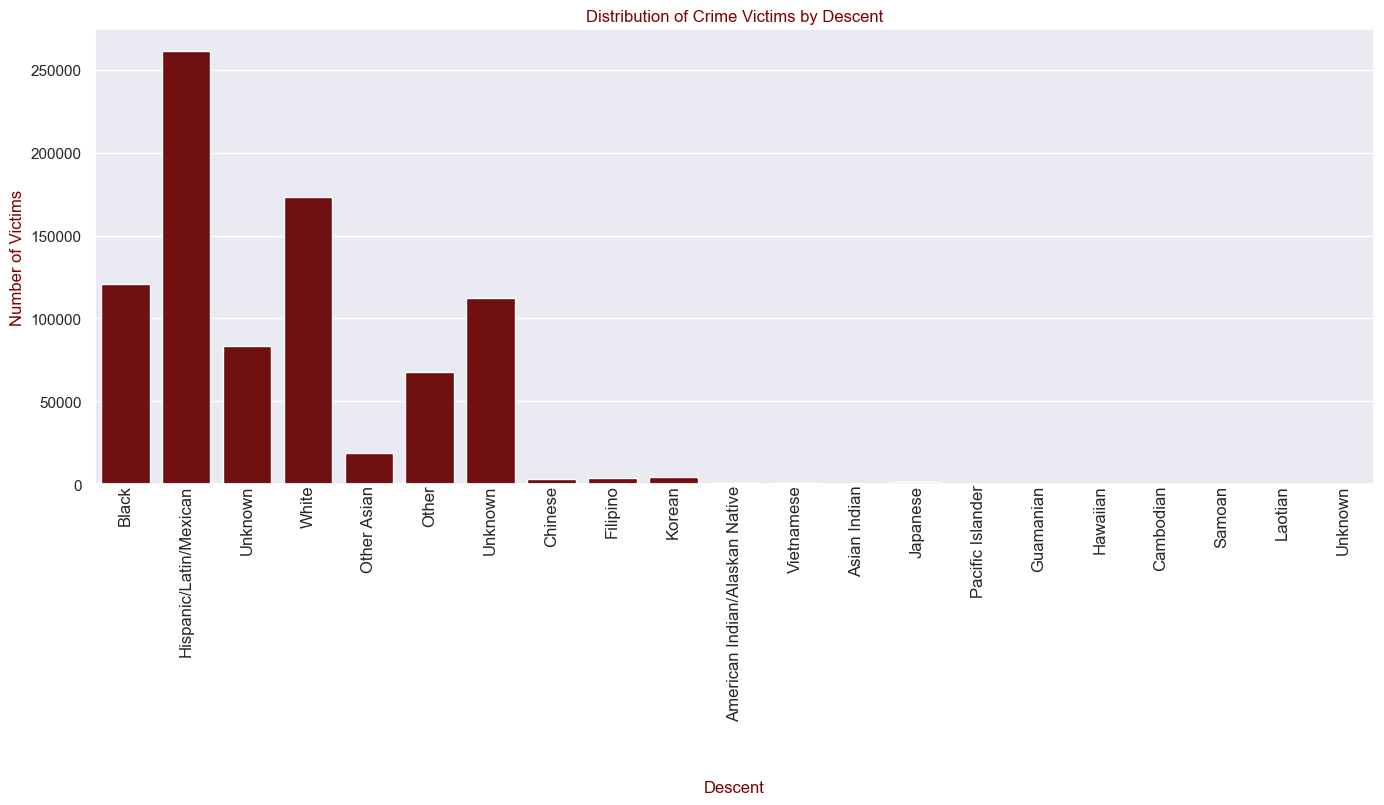

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming clean_data_df contains the cleaned dataset

# Correcting column name
clean_data_df.rename(columns={'Victim Descent': 'Victim Descent'}, inplace=True)

# Plotting distribution of crime victims by descent
plt.figure(figsize=(14, 6))  # Adjust figure size to accommodate x-axis labels
sns.countplot(x='Victim Descent', data=clean_data_df, color='maroon')  # Set color to maroon
plt.title('Distribution of Crime Victims by Descent', color='maroon')
plt.ylabel('Number of Victims',color='maroon')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add description of x-axis letters
descriptions = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}

for i, label in enumerate(clean_data_df['Victim Descent'].unique()):
    plt.text(i, -200, f"{descriptions.get(label, 'Unknown')}", rotation=90, ha='center', va='top')

# Remove tick labels
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Set x-axis label
plt.xlabel('Descent', color='maroon')  # Set color to maroon

# Set x-axis label outside of the graph
plt.gca().xaxis.set_label_coords(0.5, -0.65)

plt.show()


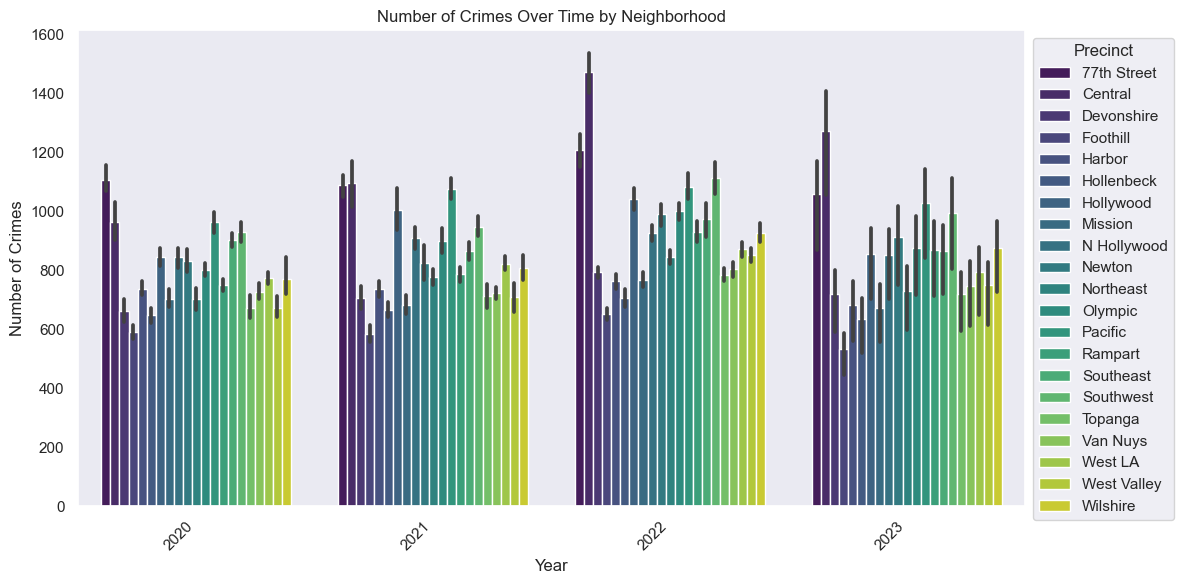

In [140]:
# Convert 'Occurence Date' to datetime format
clean_data_df['Occurence Date'] = pd.to_datetime(clean_data_df['Occurence Date'])

# Temporal Analysis by Neighborhood
# Assuming 'Neighborhood' column exists in your DataFrame

# Extracting year and month from 'Occurrence Date' column
clean_data_df['Year'] = clean_data_df['Occurence Date'].dt.year
clean_data_df['Month'] = clean_data_df['Occurence Date'].dt.month

# Grouping by year, month, and neighborhood to count the number of crimes
temporal_analysis_neighborhood = clean_data_df.groupby(['Year', 'Month', 'Precinct']).size().reset_index(name='Crime Count')

# Visualizing temporal analysis by neighborhood
plt.figure(figsize=(12, 6))
sns.barplot(data=temporal_analysis_neighborhood, x='Year', y='Crime Count', hue='Precinct', palette='viridis')
plt.title('Number of Crimes Over Time by Neighborhood')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Precinct', bbox_to_anchor=(1, 1), loc='upper left')  # Adjust legend position
plt.grid(axis='y')  # Add grid lines only on the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [137]:
# Assuming latitude and longitude columns are named differently
crime_map = folium.Map(location=[crime_data['Actual_Latitude_Column_Name'].mean(), crime_data['Actual_Longitude_Column_Name'].mean()], zoom_start=12)

# Create a HeatMap layer
heat_data = [[row['Actual_Latitude_Column_Name'], row['Actual_Longitude_Column_Name']] for index, row in crime_data.iterrows()]
HeatMap(heat_data).add_to(crime_map)

# Add title to the map
title_html = '<h3 align="center" style="font-size:20px"><b>Crime Heatmap</b></h3>'
crime_map.get_root().html.add_child(folium.Element(title_html))

# Display the map
crime_map


KeyError: 'Actual_Latitude_Column_Name'

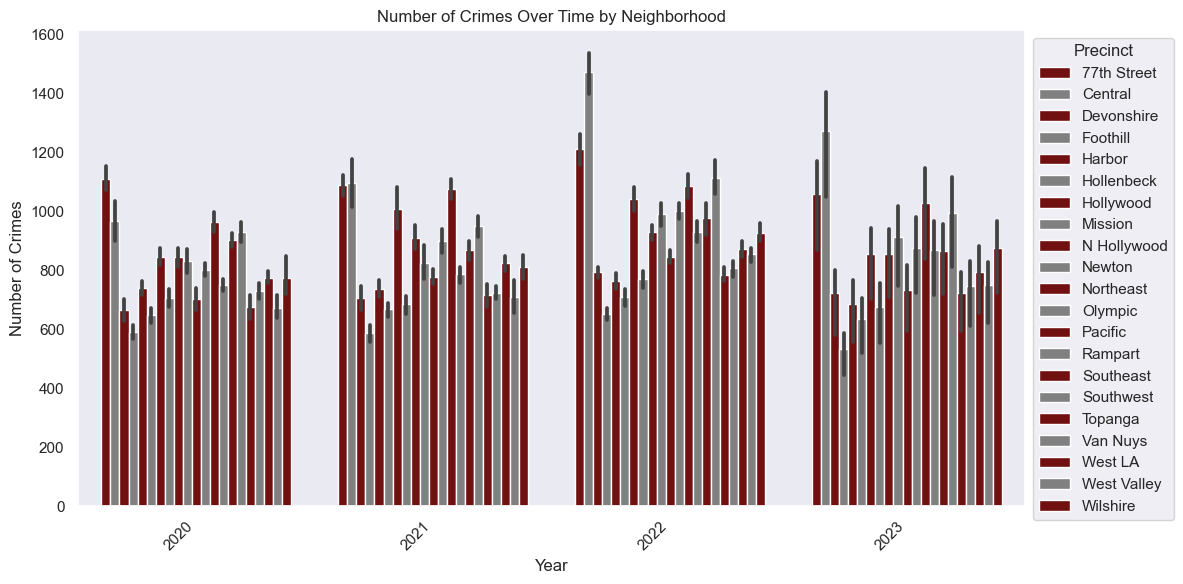

In [138]:
# Convert 'Occurence Date' to datetime format
clean_data_df['Occurence Date'] = pd.to_datetime(clean_data_df['Occurence Date'])

# Temporal Analysis by Neighborhood
# Assuming 'Neighborhood' column exists in your DataFrame

# Extracting year and month from 'Occurrence Date' column
clean_data_df['Year'] = clean_data_df['Occurence Date'].dt.year
clean_data_df['Month'] = clean_data_df['Occurence Date'].dt.month

# Grouping by year, month, and neighborhood to count the number of crimes
temporal_analysis_neighborhood = clean_data_df.groupby(['Year', 'Month', 'Precinct']).size().reset_index(name='Crime Count')

# Visualizing temporal analysis by neighborhood
plt.figure(figsize=(12, 6))
sns.barplot(data=temporal_analysis_neighborhood, x='Year', y='Crime Count', hue='Precinct', palette=['maroon', 'grey'])
plt.title('Number of Crimes Over Time by Neighborhood')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Precinct', bbox_to_anchor=(1, 1), loc='upper left')  # Adjust legend position
plt.grid(axis='y')  # Add grid lines only on the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
